# Projet:countries of the world

# Librarie

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")


# Discovering the data

In [2]:
df=pd.read_csv('countries of the world.csv')
df

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223           NaN                                NaN                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222          NaN             145,2       16,9     18,97     64,13       3   
223          NaN               NaN       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27         NaN      NaN     NaN  
4        8,71      6,25         NaN      NaN     NaN  
..        ...      

In [3]:
df.shape

(227, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [5]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [6]:
df.isnull().sum() 

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [7]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [8]:
df.describe() 


Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000

In [9]:
#There are problems with our column names.We have to fix them.
df.columns = (["country","region","population","area","density","coastline","migration","infant_mortality","gdp","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"])

In [10]:
df.head()

country                               region  population     area  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   647500   
1         Albania   EASTERN EUROPE                          3581655    28748   
2         Algeria   NORTHERN AFRICA                        32930091  2381740   
3  American Samoa   OCEANIA                                   57794      199   
4         Andorra   WESTERN EUROPE                            71201      468   

  density coastline migration infant_mortality      gdp literacy phones  \
0    48,0      0,00     23,06           163,07    700.0     36,0    3,2   
1   124,6      1,26     -4,93            21,52   4500.0     86,5   71,2   
2    13,8      0,04     -0,39               31   6000.0     70,0   78,1   
3   290,4     58,29    -20,71             9,27   8000.0     97,0  259,5   
4   152,1      0,00       6,6             4,05  19000.0    100,0  497,2   

  arable crops  other climate birthrate deathrate agriculture industry service  
0  12,13  0,22  87,65       1      46,6     20,34        0,38     0,24    0,38  
1  21,09  4,42  74,49       3     15,11      5,22       0,232    0,188   0,579  
2   3,22  0,25  96,53       1     17,14      4,61       0,101      0,6   0,298  
3     10    15     75       2     22,46      3,27         NaN      NaN     NaN  
4   2,22     0  97,78       3      8,71      6,25         NaN      NaN     NaN

In [11]:
#We have to change our datatype to "category" and "float" to use easily
df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.density= df.density.str.replace(",",".").astype(float)
df.coastline = df.coastline.astype(str).str.replace(",",".").astype(float)
df.migration = df.migration.astype(str).str.replace(",",".").astype(float)
df.infant_mortality = df.infant_mortality.astype(str).str.replace(",",".").astype(float)
df.literacy = df.literacy.astype(str).str.replace(",",".").astype(float)
df.phones = df.phones.astype(str).str.replace(",",".").astype(float)
df.arable = df.arable.astype(str).str.replace(",",".").astype(float)
df.crops = df.crops.astype(str).str.replace(",",".").astype(float)
df.other = df.other.astype(str).str.replace(",",".").astype(float)
df.climate = df.climate.astype(str).str.replace(",",".").astype(float)
df.birthrate = df.birthrate.astype(str).str.replace(",",".").astype(float)
df.deathrate = df.deathrate.astype(str).str.replace(",",".").astype(float)
df.agriculture = df.agriculture.astype(str).str.replace(",",".").astype(float)
df.industry = df.industry.astype(str).str.replace(",",".").astype(float)
df.service = df.service.astype(str).str.replace(",",".").astype(float)


In [12]:

df.head()

country                               region  population     area  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   647500   
1         Albania   EASTERN EUROPE                          3581655    28748   
2         Algeria   NORTHERN AFRICA                        32930091  2381740   
3  American Samoa   OCEANIA                                   57794      199   
4         Andorra   WESTERN EUROPE                            71201      468   

   density  coastline  migration  infant_mortality      gdp  literacy  phones  \
0     48.0       0.00      23.06            163.07    700.0      36.0     3.2   
1    124.6       1.26      -4.93             21.52   4500.0      86.5    71.2   
2     13.8       0.04      -0.39             31.00   6000.0      70.0    78.1   
3    290.4      58.29     -20.71              9.27   8000.0      97.0   259.5   
4    152.1       0.00       6.60              4.05  19000.0     100.0   497.2   

   arable  crops  other  climate  birthrate  deathrate  agriculture  industry  \
0   12.13   0.22  87.65      1.0      46.60      20.34        0.380     0.240   
1   21.09   4.42  74.49      3.0      15.11       5.22        0.232     0.188   
2    3.22   0.25  96.53      1.0      17.14       4.61        0.101     0.600   
3   10.00  15.00  75.00      2.0      22.46       3.27          NaN       NaN   
4    2.22   0.00  97.78      3.0       8.71       6.25          NaN       NaN   

   service  
0    0.380  
1    0.579  
2    0.298  
3      NaN  
4      NaN

In [13]:
df['migration'] = df['migration'].fillna(df['migration'].mean())
df['infant_mortality'] = df['infant_mortality'].fillna(df['infant_mortality'].mean())
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())
df['literacy'] = df['literacy'].fillna(df['literacy'].mean())
df['phones'] = df['phones'].fillna(df['phones'].mean())
df['arable'] = df['arable'].fillna(df['arable'].mean())
df['crops'] = df['crops'].fillna(df['crops'].mean())
df['other'] = df['other'].fillna(df['other'].mean())
df['climate'] = df['climate'].fillna(df['climate'].mean())
df['birthrate'] = df['birthrate'].fillna(df['birthrate'].mean())
df['deathrate'] = df['deathrate'].fillna(df['deathrate'].mean())
df['agriculture'] = df['agriculture'].fillna(df['agriculture'].mean())
df['industry'] = df['industry'].fillna(df['industry'].mean())
df['service'] = df['service'].fillna(df['service'].mean())


In [14]:
df.isnull().sum() 

country             0
region              0
population          0
area                0
density             0
coastline           0
migration           0
infant_mortality    0
gdp                 0
literacy            0
phones              0
arable              0
crops               0
other               0
climate             0
birthrate           0
deathrate           0
agriculture         0
industry            0
service             0
dtype: int64

In [15]:
df['region'] = df['region'].str.strip()

#We can group our data by regions and let's look at the mean of each region



In [16]:
group = df.groupby("region")
group.mean()

population          area      density   coastline  \
region                                                                      
ASIA (EX. NEAR EAST)  1.317137e+08  8.248826e+05  1264.825000   17.926786   
BALTICS               2.394991e+06  5.833833e+04    39.833333    3.116667   
C.W. OF IND. STATES   2.334013e+07  1.841737e+06    56.708333    0.093333   
EASTERN EUROPE        9.992893e+06  9.601850e+04   100.900000    1.035000   
LATIN AMER. & CARIB   1.248499e+07  4.565352e+05   136.202222   15.972222   
NEAR EAST             1.219177e+07  2.722241e+05   427.081250    3.602500   
NORTHERN AFRICA       2.690119e+07  1.003148e+06    38.933333    0.318333   
NORTHERN AMERICA      6.633446e+07  4.356494e+06   260.860000   49.640000   
OCEANIA               1.577698e+06  4.057053e+05   131.180952  107.885714   
SUB-SAHARAN AFRICA    1.469484e+07  4.772825e+05    92.264706    5.106078   
WESTERN EUROPE        1.415500e+07  1.325171e+05   952.042857   25.970714   

                      migration  infant_mortality           gdp   literacy  \
region                                                                       
ASIA (EX. NEAR EAST)   1.372500         41.780000   8053.571429  79.553571   
BALTICS               -2.033333          8.103333  11300.000000  99.733333   
C.W. OF IND. STATES   -2.033333         44.410000   4000.000000  98.725000   
EASTERN EUROPE        -0.647500         12.686667   9808.333333  93.526236   
LATIN AMER. & CARIB   -1.494444         20.092667   8682.222222  90.480851   
NEAR EAST              2.650000         23.377500  10456.250000  79.936035   
NORTHERN AFRICA       -0.353646         31.681161   6164.970501  69.839713   
NORTHERN AMERICA      -0.274000          8.628000  26100.000000  94.767656   
OCEANIA               -1.860655         21.661139   8247.619048  87.693005   
SUB-SAHARAN AFRICA    -0.335098         80.039216   2323.529412  62.908594   
WESTERN EUROPE         3.321429          4.730357  27046.428571  95.613978   

                          phones     arable      crops      other   climate  \
region                                                                        
ASIA (EX. NEAR EAST)  173.477194  15.874643   3.848929  80.276429  1.969251   
BALTICS               292.866667  30.310000   0.610000  69.080000  2.713008   
C.W. OF IND. STATES   163.850000  19.454167   2.022500  78.523333  2.481504   
EASTERN EUROPE        280.750000  30.982500   2.430833  66.587500  2.868089   
LATIN AMER. & CARIB   270.870254  10.790889   4.913556  84.295778  2.033333   
NEAR EAST             210.797590  10.553750   5.105625  84.333125  1.696189   
NORTHERN AFRICA       122.843572   7.435000   2.805000  89.760000  1.713008   
NORTHERN AMERICA      686.740000  11.426000   0.048000  88.526000  2.055610   
OCEANIA               189.885714   7.667143  14.719524  77.613333  2.000000   
SUB-SAHARAN AFRICA     42.507843  11.825237   3.804004  84.371143  1.900335   
WESTERN EUROPE        593.807143  16.821325   1.787651  81.391011  2.856185   

                      birthrate  deathrate  agriculture  industry   service  
region                                                                       
ASIA (EX. NEAR EAST)  21.157857   7.637143     0.177643  0.302143  0.520107  
BALTICS                9.343333  12.630000     0.045000  0.293333  0.661667  
C.W. OF IND. STATES   17.855833  10.341667     0.192000  0.328000  0.480167  
EASTERN EUROPE        11.349561  10.197612     0.092167  0.309250  0.598667  
LATIN AMER. & CARIB   19.081111   6.376000     0.093682  0.257298  0.646924  
NEAR EAST             25.031875   4.809375     0.063812  0.406000  0.530000  
NORTHERN AFRICA       21.030789   5.545224     0.137641  0.402285  0.432000  
NORTHERN AMERICA      13.154000   7.694000     0.068738  0.232684  0.698313  
OCEANIA               22.108321   6.137271     0.169344  0.231312  0.598544  
SUB-SAHARAN AFRICA    36.043922  15.160000     0.278347  0.267498  0.454286  
WESTERN EUROPE        10.553571   9.354643 

# Data Visualization

# Region

In [17]:
df.region

0      ASIA (EX. NEAR EAST)
1            EASTERN EUROPE
2           NORTHERN AFRICA
3                   OCEANIA
4            WESTERN EUROPE
               ...         
222               NEAR EAST
223         NORTHERN AFRICA
224               NEAR EAST
225      SUB-SAHARAN AFRICA
226      SUB-SAHARAN AFRICA
Name: region, Length: 227, dtype: object

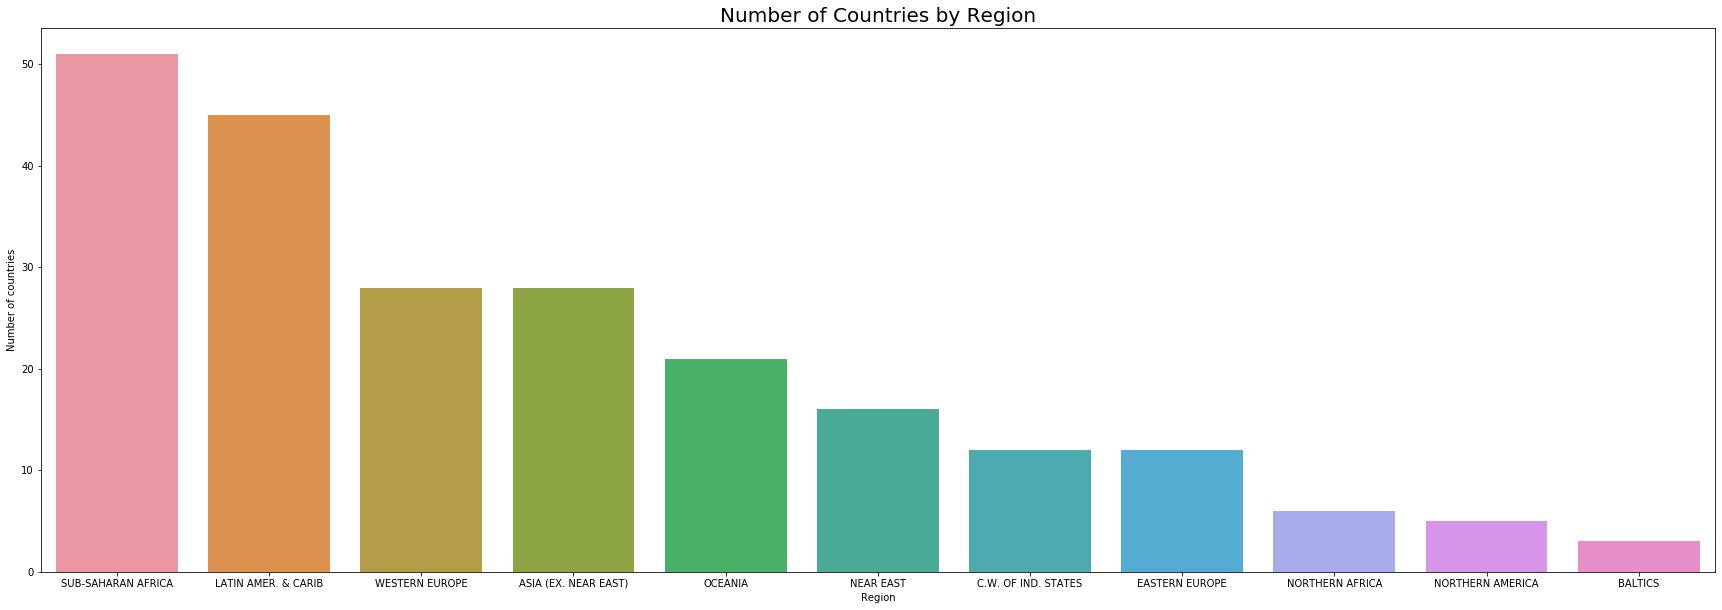

In [18]:
plt.subplots(figsize=(30,10))
sns.countplot(df['region'],order=df['region'].value_counts().index)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by Region',fontsize=20)
plt.show()

Sub-Saharan Africa region has the higest number of countries

Baltics region has the least number of countries

# Population

In [19]:
df['population'].describe()

count    2.270000e+02
mean     2.874028e+07
std      1.178913e+08
min      7.026000e+03
25%      4.376240e+05
50%      4.786994e+06
75%      1.749777e+07
max      1.313974e+09
Name: population, dtype: float64

In [20]:
#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.population,
text = df.country, colorbar = {'title':'Population'},
colorscale = 'Blackbody', reversescale = True)
layout = dict(title='Population per country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

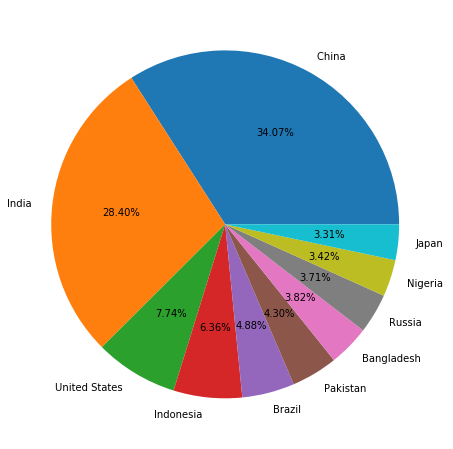

In [21]:
plt.subplots(figsize=(8,8))
df1=df.sort_values('population',ascending=False).head(10)
plt.pie('population', labels='country', autopct="%0.2f%%",data=df1)
plt.show()

the most populated Country is China followed by India and United States

In [22]:
 df.nlargest(20, 'population')

country                region  population      area  density  \
42              China   ASIA (EX. NEAR EAST)  1313973713   9596960    136.9   
94              India   ASIA (EX. NEAR EAST)  1095351995   3287590    333.2   
214     United States       NORTHERN AMERICA   298444215   9631420     31.0   
95          Indonesia   ASIA (EX. NEAR EAST)   245452739   1919440    127.9   
27             Brazil    LATIN AMER. & CARIB   188078227   8511965     22.1   
156          Pakistan   ASIA (EX. NEAR EAST)   165803560    803940    206.2   
16         Bangladesh   ASIA (EX. NEAR EAST)   147365352    144000   1023.4   
169            Russia    C.W. OF IND. STATES   142893540  17075200      8.4   
152           Nigeria     SUB-SAHARAN AFRICA   131859731    923768    142.7   
103             Japan   ASIA (EX. NEAR EAST)   127463611    377835    337.4   
135            Mexico    LATIN AMER. & CARIB   107449525   1972550     54.5   
162       Philippines   ASIA (EX. NEAR EAST)    89468677    300000    298.2   
219           Vietnam   ASIA (EX. NEAR EAST)    84402966    329560    256.1   
76            Germany         WESTERN EUROPE    82422299    357021    230.9   
60              Egypt        NORTHERN AFRICA    78887007   1001450     78.8   
65           Ethiopia     SUB-SAHARAN AFRICA    74777981   1127127     66.3   
206            Turkey              NEAR EAST    70413958    780580     90.2   
96               Iran   ASIA (EX. NEAR EAST)    68688433   1648000     41.7   
201          Thailand   ASIA (EX. NEAR EAST)    64631595    514000    125.7   
45   Congo, Dem. Rep.     SUB-SAHARAN AFRICA    62660551   2345410     26.7   

     coastline  migration  infant_mortality      gdp  literacy  phones  \
42        0.15      -0.40             24.18   5000.0      90.9   266.7   
94        0.21      -0.07             56.29   2900.0      59.5    45.4   
214       0.21       3.41              6.50  37800.0      97.0   898.0   
95        2.85       0.00             35.60   3200.0      87.9    52.0   
27        0.09      -0.03             29.61   7600.0      86.4   225.3   
156       0.13      -2.77             72.44   2100.0      45.7    31.8   
16        0.40      -0.71             62.60   1900.0      43.1     7.3   
169       0.22       1.02             15.39   8900.0      99.6   280.6   
152       0.09       0.26             98.80    900.0      68.0     9.3   
103       7.87       0.00              3.26  28200.0      99.0   461.2   
135       0.47      -4.87             20.91   9000.0      92.2   181.6   
162      12.10      -1.50             23.51   4600.0      92.6    38.4   
219       1.05      -0.45             25.95   2500.0      90.3   187.7   
76        0.67       2.18              4.16  27600.0      99.0   667.9   
60        0.24      -0.22             32.59   4000.0      57.7   131.8   
65        0.00       0.00             95.32    700.0      42.7     8.2   
206       0.92       0.00             41.04   6700.0      86.5   269.5   
96        0.15      -0.84             41.58   7000.0      79.4   276.4   
201       0.63       0.00             20.48   7400.0      92.6   108.9   
45        0.00       0.00             94.69    700.0      65.5     0.2   

     arable  crops  other   climate  birthrate  deathrate  agriculture  \
42    15.40   1.25  83.35  1.500000      13.25       6.97        0.125   
94    54.40   2.74  42.86  2.500000      22.01       8.18        0.186   
214   19.13   0.22  80.65  3.000000      14.14       8.26        0.010   
95    11.32   7.23  81.45  2.000000      20.34       6.25        0.134   
27     6.96   0.90  92.15  2.000000      16.56       6.17        0.084   
156   27.87   0.87  71.26  1.000000      29.74       8.23        0.216   
16    62.11   3.07  34.82  2.000000      29.80       8.27        0.199   
169    7.33   0.11  92.56  2.139024       9.95      14.65        0.054   
152   31.29   2.96  65.75  1.500000      40.43      16.94        0.269   
103   12.19   0.96  86.85  3.000000       9.37       9.16   

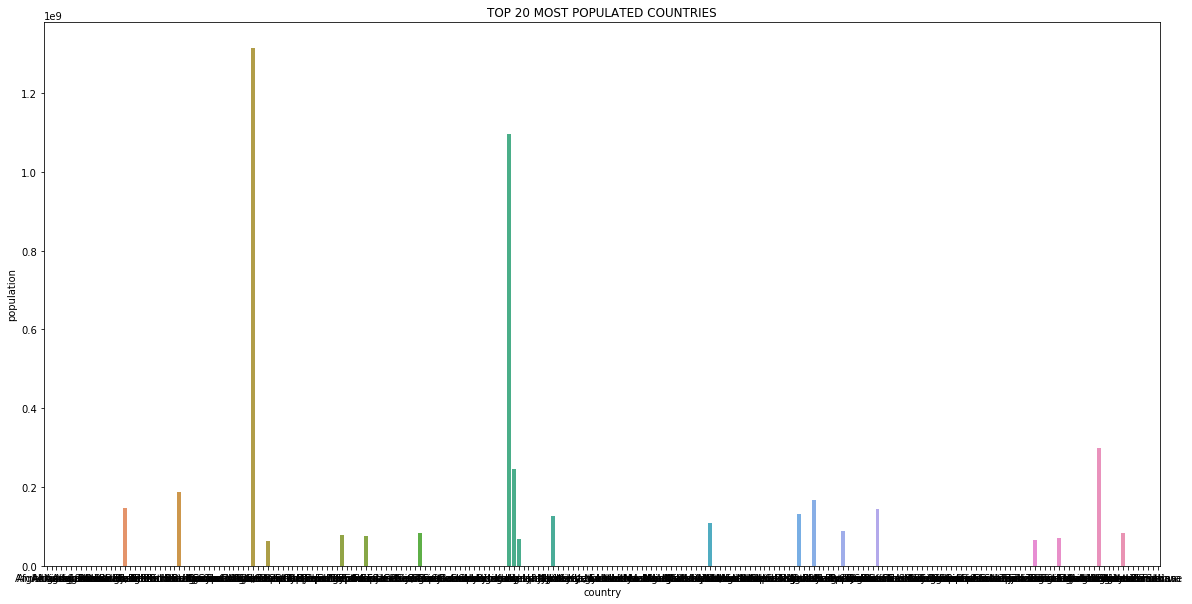

Text(0.5, 1.0, 'MOST POPULATED REGIONS')

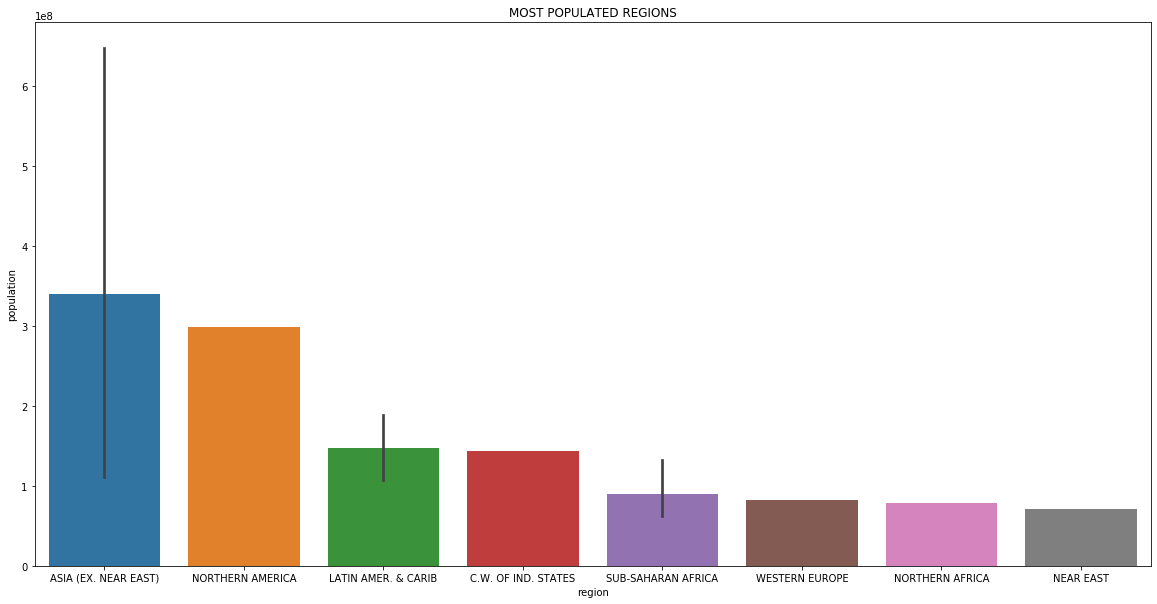

In [23]:
#POPULATION V/S COUNTRY AND V/S REGION
plt.figure(figsize=(20,10))
sns.barplot(data = df.nlargest(20, 'population'), x = 'country', y = 'population')
plt.title("TOP 20 MOST POPULATED COUNTRIES")
plt.show()

# Region
plt.figure(figsize=(20,10))
sns.barplot(data = df.nlargest(20, 'population'), x = 'region', y = 'population')
plt.title("MOST POPULATED REGIONS")


We observe that India has the 2nd highest population.
USA accounts to the most of Northern American population.

# Area

In [24]:
df.nlargest(20, 'area')

country                region  population      area  density  \
169            Russia    C.W. OF IND. STATES   142893540  17075200      8.4   
36             Canada       NORTHERN AMERICA    33098932   9984670      3.3   
214     United States       NORTHERN AMERICA   298444215   9631420     31.0   
42              China   ASIA (EX. NEAR EAST)  1313973713   9596960    136.9   
27             Brazil    LATIN AMER. & CARIB   188078227   8511965     22.1   
11          Australia                OCEANIA    20264082   7686850      2.6   
94              India   ASIA (EX. NEAR EAST)  1095351995   3287590    333.2   
8           Argentina    LATIN AMER. & CARIB    39921833   2766890     14.4   
106        Kazakhstan    C.W. OF IND. STATES    15233244   2717300      5.6   
192             Sudan     SUB-SAHARAN AFRICA    41236378   2505810     16.5   
2             Algeria        NORTHERN AFRICA    32930091   2381740     13.8   
45   Congo, Dem. Rep.     SUB-SAHARAN AFRICA    62660551   2345410     26.7   
80          Greenland       NORTHERN AMERICA       56361   2166086      0.0   
135            Mexico    LATIN AMER. & CARIB   107449525   1972550     54.5   
179      Saudi Arabia              NEAR EAST    27019731   1960582     13.8   
95          Indonesia   ASIA (EX. NEAR EAST)   245452739   1919440    127.9   
118             Libya        NORTHERN AFRICA     5900754   1759540      3.4   
96               Iran   ASIA (EX. NEAR EAST)    68688433   1648000     41.7   
139          Mongolia   ASIA (EX. NEAR EAST)     2832224   1564116      1.8   
161              Peru    LATIN AMER. & CARIB    28302603   1285220     22.0   

     coastline  migration  infant_mortality      gdp    literacy  phones  \
169       0.22       1.02             15.39   8900.0   99.600000   280.6   
36        2.02       5.96              4.75  29800.0   97.000000   552.2   
214       0.21       3.41              6.50  37800.0   97.000000   898.0   
42        0.15      -0.40             24.18   5000.0   90.900000   266.7   
27        0.09      -0.03             29.61   7600.0   86.400000   225.3   
11        0.34       3.98              4.69  29000.0  100.000000   565.5   
94        0.21      -0.07             56.29   2900.0   59.500000    45.4   
8         0.18       0.61             15.18  11200.0   97.100000   220.4   
106       0.00      -3.35             29.21   6300.0   98.400000   164.1   
192       0.03      -0.02             62.50   1900.0   61.100000    16.3   
2         0.04      -0.39             31.00   6000.0   70.000000    78.1   
45        0.00       0.00             94.69    700.0   65.500000     0.2   
80        2.04      -8.37             15.82  20000.0   82.838278   448.9   
135       0.47      -4.87             20.91   9000.0   92.200000   181.6   
179       0.13      -2.71             13.24  11800.0   78.800000   140.6   
95        2.85       0.00             35.60   3200.0   87.900000    52.0   
118       0.10       0.00             24.60   6400.0   82.600000   127.1   
96        0.15      -0.84             41.58   7000.0   79.400000   276.4   
139       0.00       0.00             53.79   1800.0   97.800000    55.1   
161       0.19      -1.05             31.94   5100.0   90.900000    79.5   

     arable  crops   other   climate  birthrate  deathrate  agriculture  \
169    7.33   0.11   92.56  2.139024       9.95      14.65     0.054000   
36     4.96   0.02   95.02  2.139024      10.78       7.80     0.022000   
214   19.13   0.22   80.65  3.000000      14.14       8.26     0.010000   
42    15.40   1.25   83.35  1.500000      13.25       6.97     0.125000   
27     6.96   0.90   92.15  2.000000      16.56       6.17     0.084000   
11     6.55   0.04   93.41  1.000000      12.14       7.51     0.038000   
94    54.40   2.74   42.86  2.500000      22.01       8.18     0.186000   
8     12.31   0.48   87.21  3.000000      16.73       7.55     0.095000   
106    7.98   0.05   91.97  4.000000      16.00       9.42     0.067000   
192    6

Russia is the largest country by miles.

# Climate

In [25]:
df['climate'].describe()

count    227.000000
mean       2.139024
std        0.664484
min        1.000000
25%        2.000000
50%        2.000000
75%        2.319512
max        4.000000
Name: climate, dtype: float64

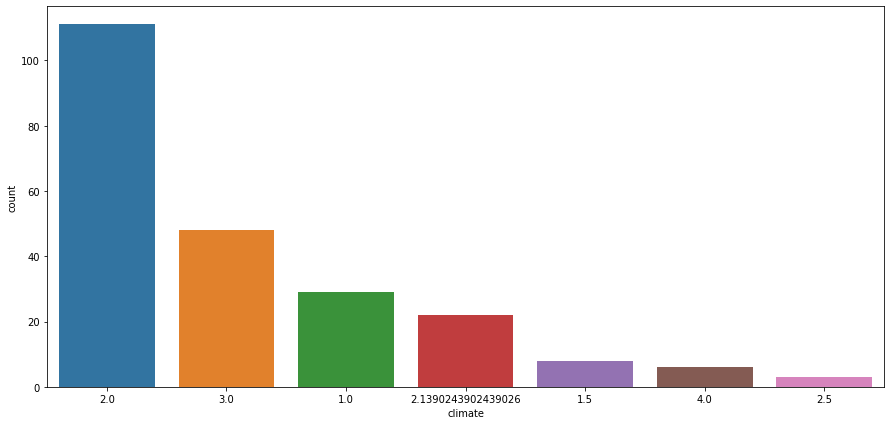

In [26]:
plt.subplots(figsize=(15,7))
sns.countplot(x=df['climate'],order=df['climate'].value_counts().index)
plt.show()

The most common climate around the world is of category 2

# Density

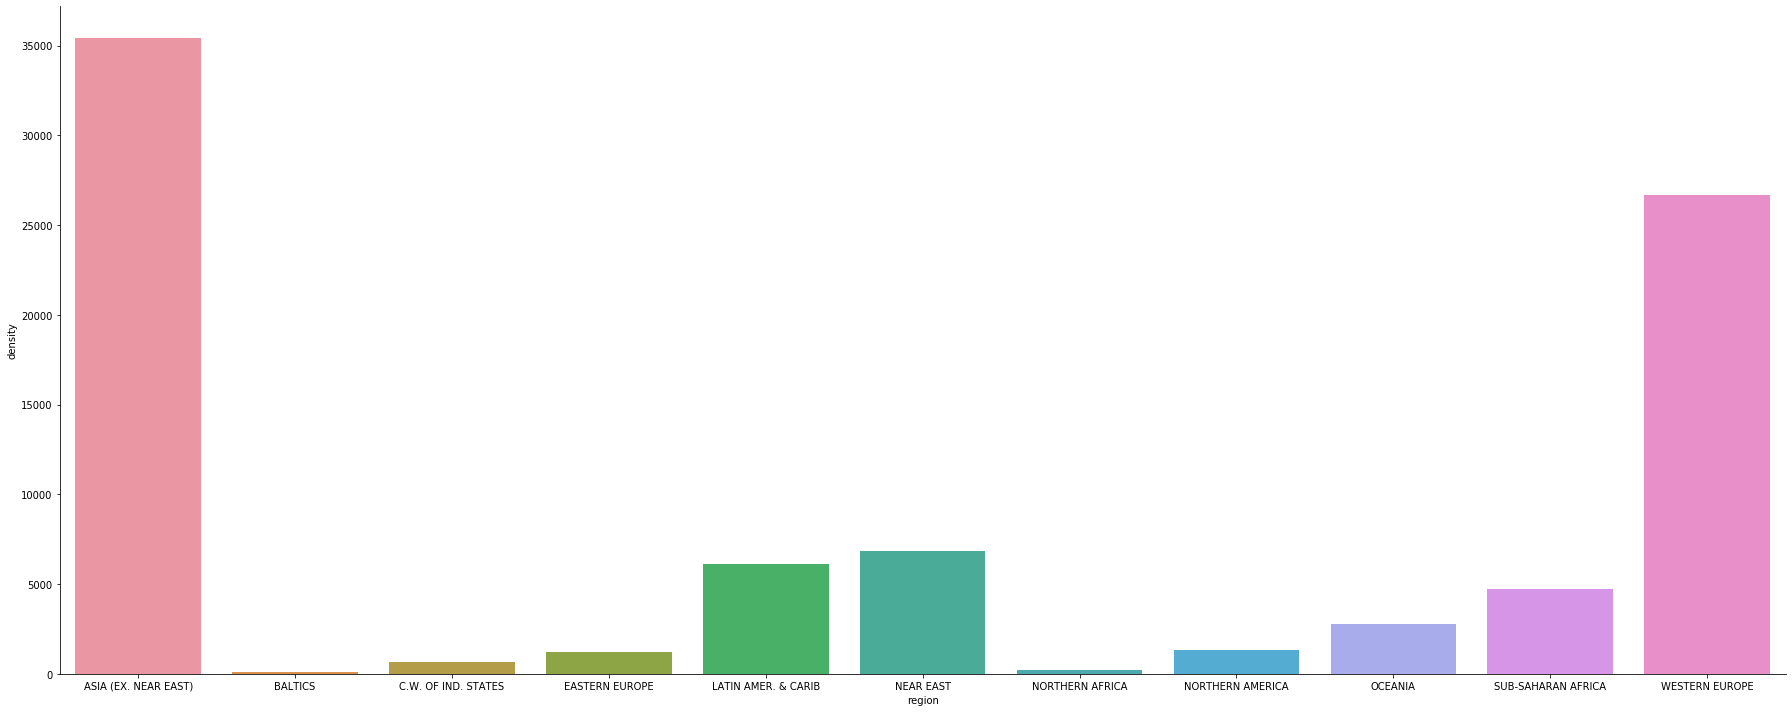

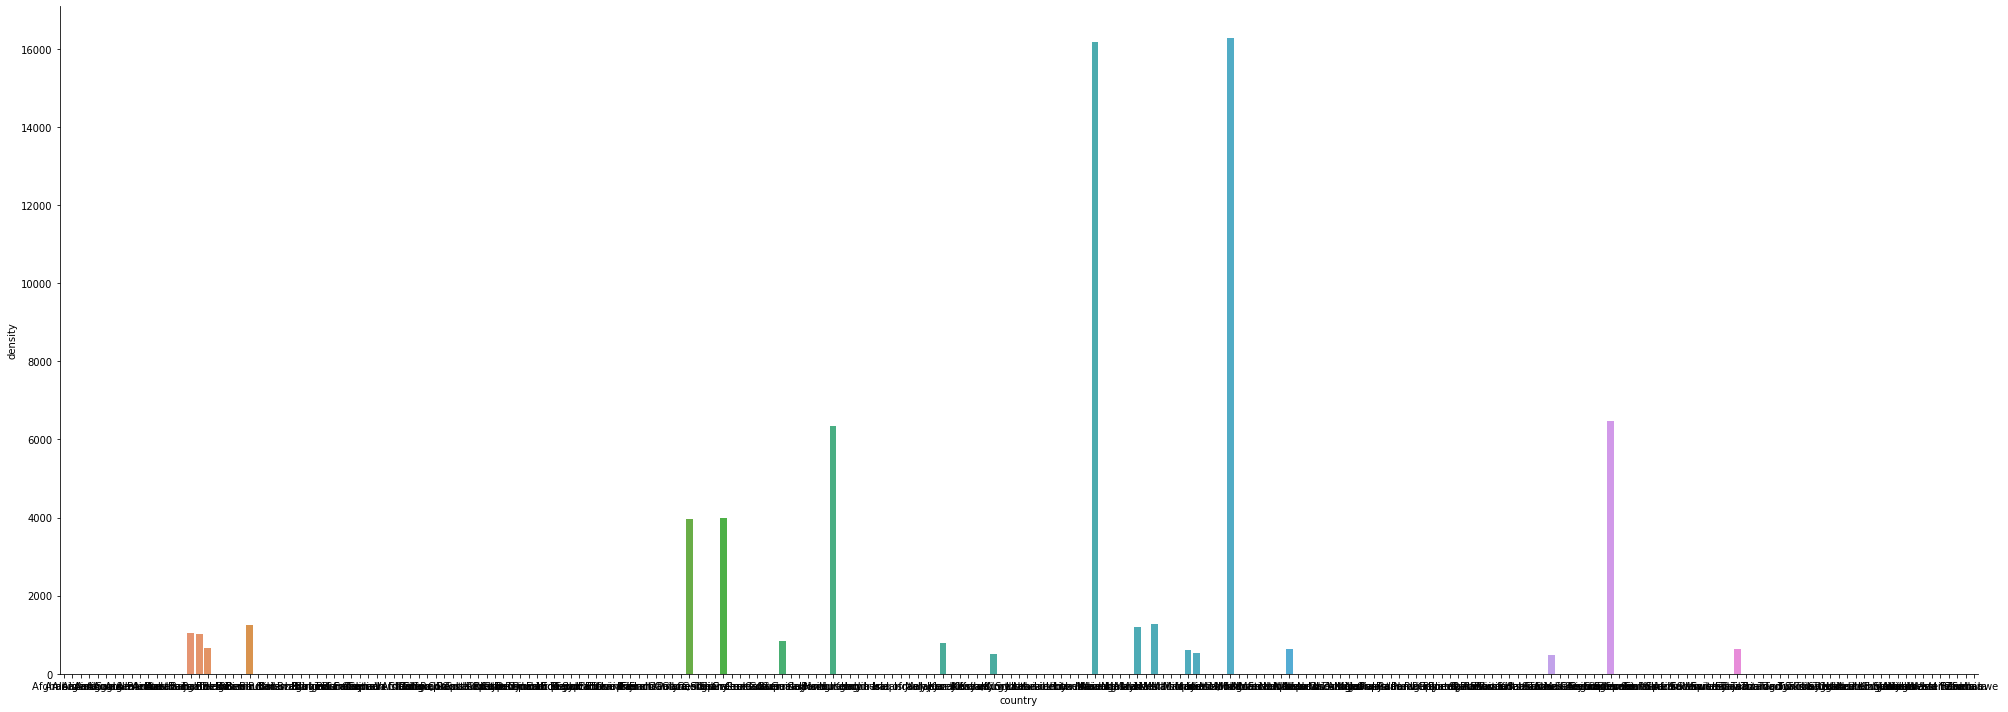

In [27]:
sns.catplot(x="region", y="density", kind="bar", data=df.groupby('region').sum().reset_index(), height=10,aspect=2.5);
sns.catplot(x="country", y="density", kind="bar", data=df.nlargest(20, 'density'), height=10,aspect=2.8);



In [28]:
df.nlargest(20, 'density')

country                region  population    area  density  \
138        Monaco         WESTERN EUROPE       32543       2  16271.5   
122         Macau   ASIA (EX. NEAR EAST)      453125      28  16183.0   
184     Singapore   ASIA (EX. NEAR EAST)     4492150     693   6482.2   
91      Hong Kong   ASIA (EX. NEAR EAST)     6940432    1092   6355.7   
78      Gibraltar         WESTERN EUROPE       27928       7   3989.7   
74     Gaza Strip              NEAR EAST     1428757     360   3968.8   
129         Malta         WESTERN EUROPE      400214     316   1266.5   
22        Bermuda       NORTHERN AMERICA       65773      53   1241.0   
127      Maldives   ASIA (EX. NEAR EAST)      359008     300   1196.7   
15        Bahrain              NEAR EAST      698585     665   1050.5   
16     Bangladesh   ASIA (EX. NEAR EAST)   147365352  144000   1023.4   
85       Guernsey         WESTERN EUROPE       65409      78    838.6   
104        Jersey         WESTERN EUROPE       91084     116    785.2   
17       Barbados    LATIN AMER. & CARIB      279912     431    649.5   
198        Taiwan   ASIA (EX. NEAR EAST)    23036087   35980    640.3   
144         Nauru                OCEANIA       13287      21    632.7   
133     Mauritius     SUB-SAHARAN AFRICA     1240827    2040    608.3   
134       Mayotte     SUB-SAHARAN AFRICA      201234     374    538.1   
110  Korea, South   ASIA (EX. NEAR EAST)    48846823   98480    496.0   
177    San Marino         WESTERN EUROPE       29251      61    479.5   

     coastline  migration  infant_mortality      gdp   literacy  phones  \
138     205.00       7.75              5.43  27000.0  99.000000  1035.6   
122     146.43       4.86              4.39  19400.0  94.500000   384.9   
184      27.85      11.53              2.29  23700.0  92.500000   411.4   
91       67.12       5.24              2.97  28800.0  93.500000   546.7   
78      171.43       0.00              5.13  17500.0  82.838278   877.7   
74       11.11       1.60             22.93    600.0  82.838278   244.3   
129      62.28       2.07              3.89  17700.0  92.800000   505.0   
22      194.34       2.49              8.53  36000.0  98.000000   851.4   
127     214.67       0.00             56.52   3900.0  97.200000    90.0   
15       24.21       1.05             17.27  16900.0  89.100000   281.3   
16        0.40      -0.71             62.60   1900.0  43.100000     7.3   
85       64.10       3.84              4.71  20000.0  82.838278   842.4   
104      60.34       2.76              5.24  24800.0  82.838278   811.3   
17       22.51      -0.31             12.50  15700.0  97.400000   481.9   
198       4.35       0.00              6.40  23400.0  96.100000   591.0   
144     142.86       0.00              9.95   5000.0  82.838278   143.0   
133       8.68      -0.90             15.03  11400.0  85.600000   289.3   
134      49.52       6.78             62.40   2600.0  82.838278    49.7   
110       2.45       0.00              7.05  17800.0  97.900000   486.1   
177       0.00      10.98              5.73  34600.0  96.000000   704.3   

        arable      crops       other   climate  birthrate  deathrate  \
138   0.000000   0.000000  100.000000  2.139024       9.19      12.91   
122   0.000000   0.000000  100.000000  2.000000       8.48       4.47   
184   1.640000   0.000000   98.360000  2.000000       9.34       4.28   
91    5.050000   1.010000   93.940000  2.000000       7.29       6.29   
78    0.000000   0.000000  100.000000  2.139024      10.74       9.31   
74   28.950000  21.050000   50.000000  3.000000      39.45       3.80   
129  28.130000   3.130000   68.740000  2.139024      10.22       8.10   
22   20.000000   0.000000   80.000000  2.000000      11.40       7.74   
127  13.330000  16.670000   70.000000  2.000000      34.81       7.06   
15    2.820000   5.630000   91.550000  1.000000      17.80       4.14   
16   62.110000   3.070000   34.820000  2.000000      29.80       8.27   
85   13.797111   4.564222

East Asia and West Europe has the higest population densities

Monaco, macau, Singapore, Honk kong has the highest pop. density, each of them are city-country, or micro-state






# GDP

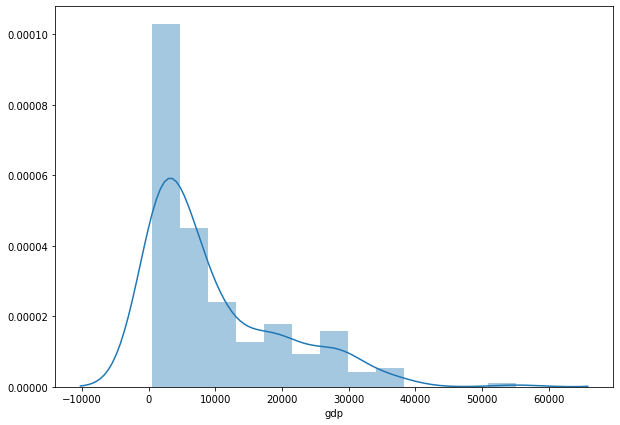

In [29]:
plt.subplots(figsize=(10,7))
sns.distplot(df['gdp'])
plt.show()

In [30]:
 df.nlargest(20, 'gdp')

country                region  population     area  density  \
121      Luxembourg         WESTERN EUROPE      474413     2586    183.5   
154          Norway         WESTERN EUROPE     4610820   323802     14.2   
214   United States       NORTHERN AMERICA   298444215  9631420     31.0   
22          Bermuda       NORTHERN AMERICA       65773       53   1241.0   
38   Cayman Islands    LATIN AMER. & CARIB       45436      262    173.4   
177      San Marino         WESTERN EUROPE       29251       61    479.5   
196     Switzerland         WESTERN EUROPE     7523934    41290    182.2   
54          Denmark         WESTERN EUROPE     5450661    43094    126.5   
93          Iceland         WESTERN EUROPE      299388   103000      2.9   
12          Austria         WESTERN EUROPE     8192880    83870     97.7   
36           Canada       NORTHERN AMERICA    33098932  9984670      3.3   
98          Ireland         WESTERN EUROPE     4062235    70280     57.8   
19          Belgium         WESTERN EUROPE    10379067    30528    340.0   
11        Australia                OCEANIA    20264082  7686850      2.6   
91        Hong Kong   ASIA (EX. NEAR EAST)     6940432     1092   6355.7   
146     Netherlands         WESTERN EUROPE    16491461    41526    397.1   
103           Japan   ASIA (EX. NEAR EAST)   127463611   377835    337.4   
10            Aruba    LATIN AMER. & CARIB       71891      193    372.5   
213  United Kingdom         WESTERN EUROPE    60609153   244820    247.6   
69           France         WESTERN EUROPE    60876136   547030    111.3   

     coastline  migration  infant_mortality      gdp  literacy  phones  \
121       0.00       8.97              4.81  55100.0     100.0   515.4   
154       7.77       1.74              3.70  37800.0     100.0   461.7   
214       0.21       3.41              6.50  37800.0      97.0   898.0   
22      194.34       2.49              8.53  36000.0      98.0   851.4   
38       61.07      18.75              8.19  35000.0      98.0   836.3   
177       0.00      10.98              5.73  34600.0      96.0   704.3   
196       0.00       4.05              4.39  32700.0      99.0   680.9   
54       16.97       2.48              4.56  31100.0     100.0   614.6   
93        4.83       2.38              3.31  30900.0      99.9   647.7   
12        0.00       2.00              4.66  30000.0      98.0   452.2   
36        2.02       5.96              4.75  29800.0      97.0   552.2   
98        2.06       4.99              5.39  29600.0      98.0   500.5   
19        0.22       1.23              4.68  29100.0      98.0   462.6   
11        0.34       3.98              4.69  29000.0     100.0   565.5   
91       67.12       5.24              2.97  28800.0      93.5   546.7   
146       1.09       2.91              5.04  28600.0      99.0   460.8   
103       7.87       0.00              3.26  28200.0      99.0   461.2   
10       35.49       0.00              5.89  28000.0      97.0   516.1   
213       5.08       2.19              5.16  27700.0      99.0   543.5   
69        0.63       0.66              4.26  27600.0      99.0   586.4   

     arable  crops  other   climate  birthrate  deathrate  agriculture  \
121   23.28   0.40  76.32  2.139024      11.94       8.41     0.010000   
154    2.87   0.00  97.13  3.000000      11.46       9.40     0.021000   
214   19.13   0.22  80.65  3.000000      14.14       8.26     0.010000   
22    20.00   0.00  80.00  2.000000      11.40       7.74     0.010000   
38     3.85   0.00  96.15  2.000000      12.74       4.89     0.014000   
177   16.67   0.00  83.33  2.139024      10.02       8.17     0.150844   
196   10.42   0.61  88.97  3.000000       9.71       8.49     0.015000   
54    54.02   0.19  45.79  3.000000      11.13      10.36     0.018000   
93     0.07   0.00  99.93  3.000000      13.64       6.72     0.086000   
12    16.91   0.86  82.23  3.000000       8.74       9.76     0.018000   
36     4.96   0.02  95.02  2.139024      10.78 

The standard deviation is higher than the mean, which shows how uneually wealthy some countries are Countries like Luxembourg, Norway, Us are way too rich while countries like Somalia, Sierra Leone , Tanzania are very poor

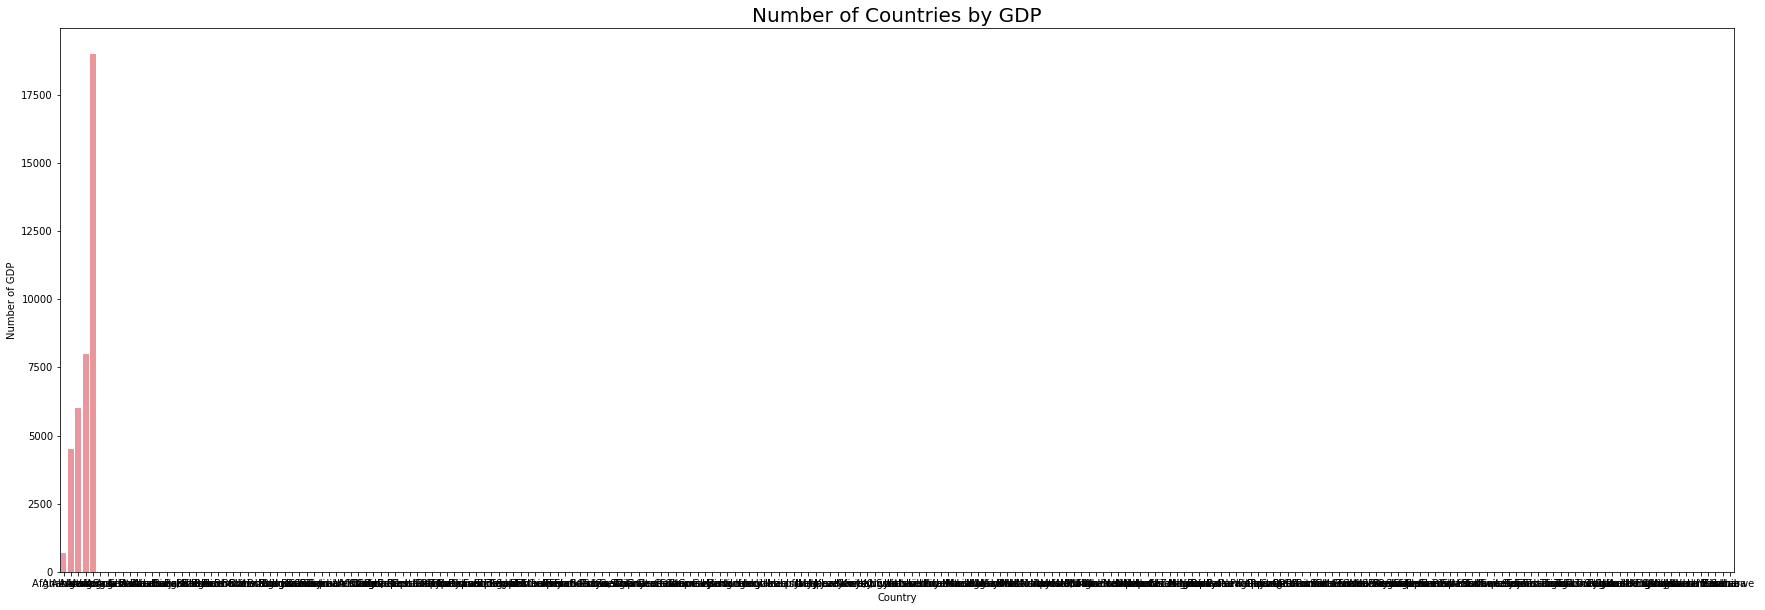

In [31]:
plt.subplots(figsize=(30,10))
sns.barplot(x='country',y='gdp',data=df[:5])
plt.ylabel('Number of GDP')
plt.xlabel('Country')
plt.title('Number of Countries by GDP',fontsize=20)
plt.show()

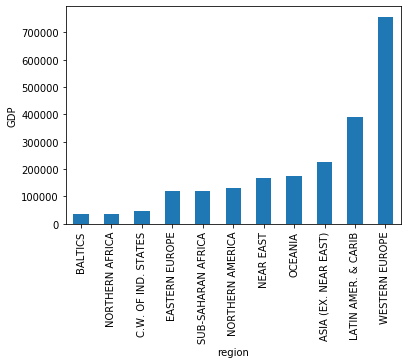

In [32]:
df.groupby('region')['gdp'].sum().sort_values().plot(kind='bar')
plt.ylabel('GDP')
plt.show()

In [33]:
#GDP per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df['gdp'],
text = df.country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

West European Countries, Oceania along with US, Canada and Japan have the highest GDPs in the world

# Birthrate

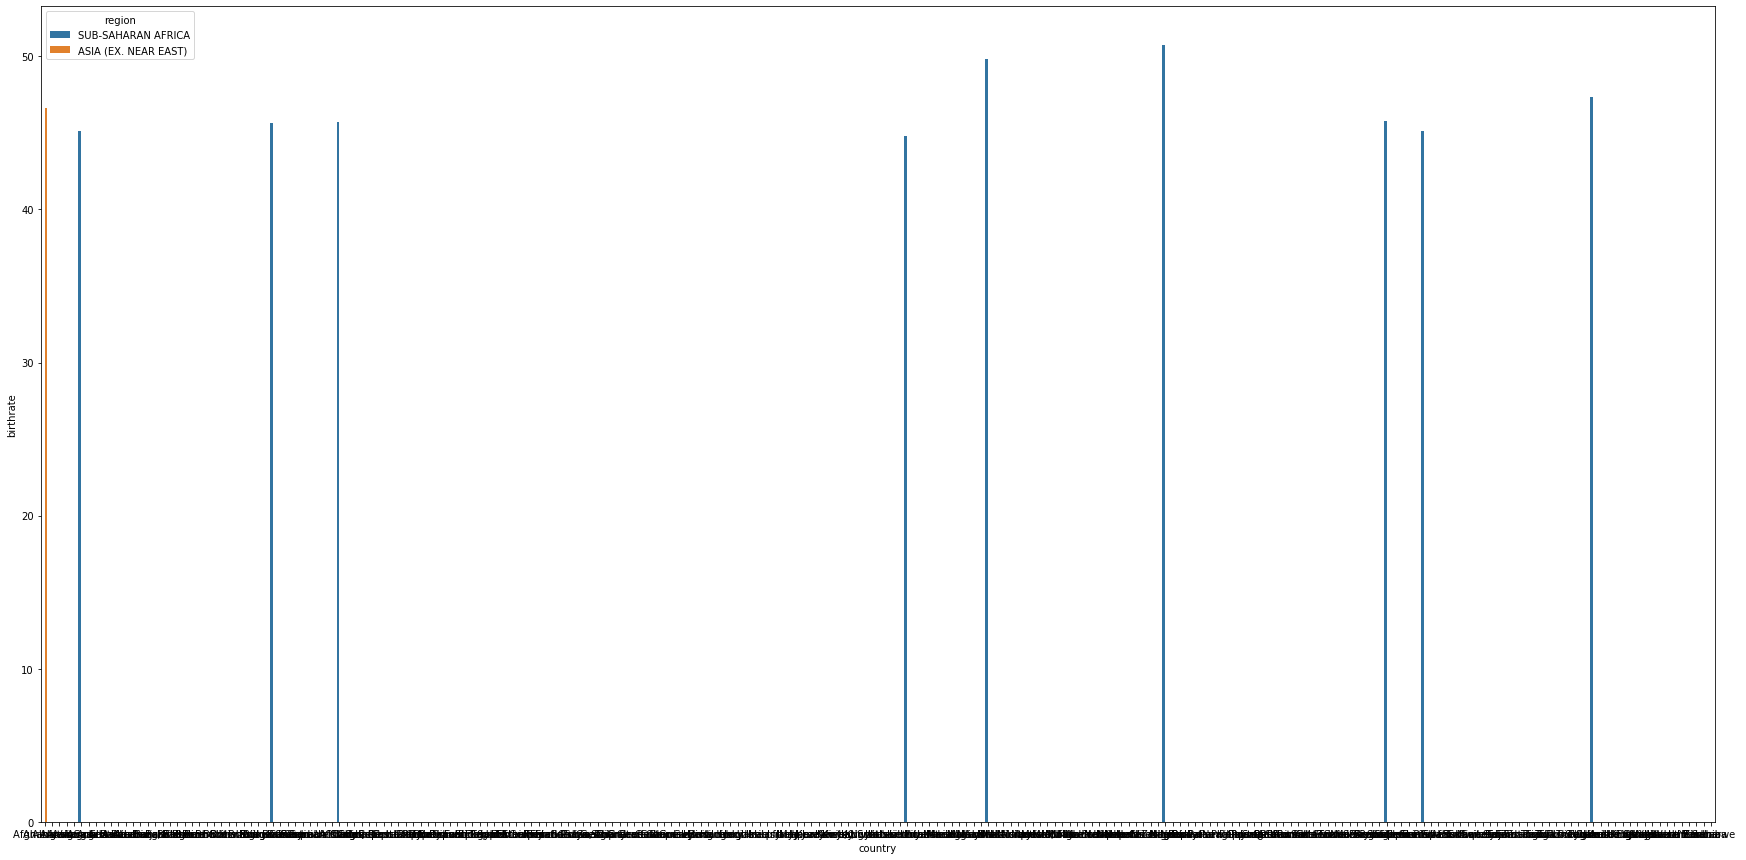

In [34]:
plt.subplots(figsize=(30,15))
df2=df.sort_values('birthrate',ascending=False).head(10)
sns.barplot(x='country',y='birthrate',hue='region',data=df2)
plt.show()

In [35]:
 df.nlargest(20, 'birthrate')

country                region  population     area  \
151                 Niger     SUB-SAHARAN AFRICA    12525094  1267000   
128                  Mali     SUB-SAHARAN AFRICA    11716829  1240000   
210                Uganda     SUB-SAHARAN AFRICA    28195754   236040   
0             Afghanistan   ASIA (EX. NEAR EAST)    31056997   647500   
183          Sierra Leone     SUB-SAHARAN AFRICA     6005250    71740   
40                   Chad     SUB-SAHARAN AFRICA     9944201  1284000   
31           Burkina Faso     SUB-SAHARAN AFRICA    13902972   274200   
188               Somalia     SUB-SAHARAN AFRICA     8863338   637657   
5                  Angola     SUB-SAHARAN AFRICA    12127071  1246700   
117               Liberia     SUB-SAHARAN AFRICA     3042004   111370   
45       Congo, Dem. Rep.     SUB-SAHARAN AFRICA    62660551  2345410   
125                Malawi     SUB-SAHARAN AFRICA    13013926   118480   
224                 Yemen              NEAR EAST    21456188   527970   
46   Congo, Repub. of the     SUB-SAHARAN AFRICA     3702314   342000   
33                Burundi     SUB-SAHARAN AFRICA     8090068    27830   
86                 Guinea     SUB-SAHARAN AFRICA     9690222   245857   
124            Madagascar     SUB-SAHARAN AFRICA    18595469   587040   
225                Zambia     SUB-SAHARAN AFRICA    11502010   752614   
132            Mauritania     SUB-SAHARAN AFRICA     3177388  1030700   
134               Mayotte     SUB-SAHARAN AFRICA      201234      374   

     density  coastline  migration  infant_mortality     gdp   literacy  \
151      9.9       0.00      -0.67            121.69   800.0  17.600000   
128      9.5       0.00      -0.33            116.79   900.0  46.400000   
210    119.5       0.00       0.00             67.83  1400.0  69.900000   
0       48.0       0.00      23.06            163.07   700.0  36.000000   
183     83.7       0.56       0.00            143.64   500.0  31.400000   
40       7.7       0.00      -0.11             93.82  1200.0  47.500000   
31      50.7       0.00       0.00             97.57  1100.0  26.600000   
188     13.9       0.47       5.37            116.70   500.0  37.800000   
5        9.7       0.13       0.00            191.19  1900.0  42.000000   
117     27.3       0.52       0.00            128.87  1000.0  57.500000   
45      26.7       0.00       0.00             94.69   700.0  65.500000   
125    109.8       0.00       0.00            103.32   600.0  62.700000   
224     40.6       0.36       0.00             61.50   800.0  50.200000   
46      10.8       0.05      -0.17             93.86   700.0  83.800000   
33     290.7       0.00      -0.06             69.29   600.0  51.600000   
86      39.4       0.13      -3.06             90.37  2100.0  35.900000   
124     31.7       0.82       0.00             76.83   800.0  68.900000   
225     15.3       0.00       0.00             88.29   800.0  80.600000   
132      3.1       0.07       0.00             70.89  1800.0  41.700000   
134    538.1      49.52       6.78             62.40  2600.0  82.838278   

     phones     arable      crops      other   climate  birthrate  deathrate  \
151     1.9   3.540000   0.010000  96.450000  1.000000      50.73      20.91   
128     6.4   3.820000   0.030000  96.150000  2.000000      49.82      16.89   
210     3.6  25.880000  10.650000  63.470000  2.000000      47.35      12.24   
0       3.2  12.130000   0.220000  87.650000  1.000000      46.60      20.34   
183     4.0   6.980000   0.890000  92.130000  2.000000      45.76      23.03   
40      1.3   2.860000   0.020000  97.120000  2.000000      45.73      16.38   
31      7.0  14.430000   0.190000  85.380000  2.000000      45.62      15.60   
188    11.3   1.670000   0.040000  98.290000  1.000000      45.13      16.63   
5       7.8   2.410000   0.240000  97.350000  2.139024      45.11      24.20   
117     2.3   3.950000   2.280000  93.770000  2.000000      44.77      23.10   
45      0.2   2.960000   0.52

The birthrate is maximum for Niger followed by Mail and Uganda

In [36]:
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df['birthrate'],
text = df.country, colorbar = {'title':'birthrate'},
colorscale = 'YlOrRd', reversescale = False)
layout = dict(title='birthrate per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Deathrate

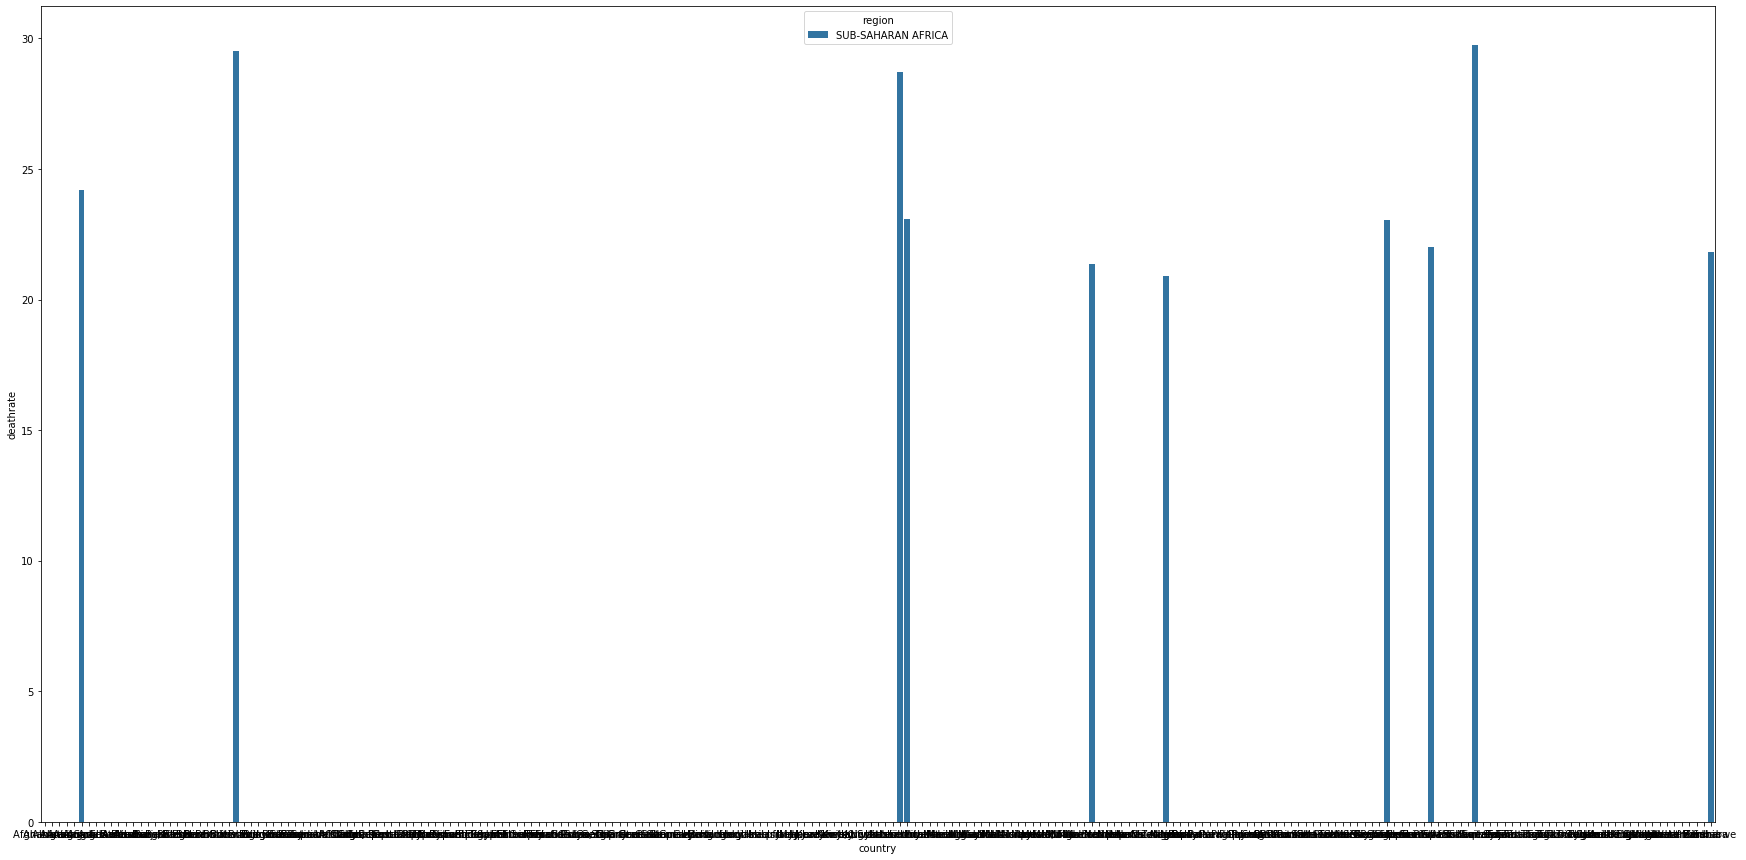

In [37]:
plt.subplots(figsize=(30,15))
df5=df.sort_values('deathrate',ascending=False).head(10)
sns.barplot(x='country',y='deathrate',hue='region',data=df5)
plt.show()

In [38]:
 df.nlargest(20, 'deathrate')

country                region  population     area  \
194             Swaziland     SUB-SAHARAN AFRICA     1136334    17363   
26               Botswana     SUB-SAHARAN AFRICA     1639833   600370   
116               Lesotho     SUB-SAHARAN AFRICA     2022331    30355   
5                  Angola     SUB-SAHARAN AFRICA    12127071  1246700   
117               Liberia     SUB-SAHARAN AFRICA     3042004   111370   
183          Sierra Leone     SUB-SAHARAN AFRICA     6005250    71740   
189          South Africa     SUB-SAHARAN AFRICA    44187637  1219912   
226              Zimbabwe     SUB-SAHARAN AFRICA    12236805   390580   
142            Mozambique     SUB-SAHARAN AFRICA    19686505   801590   
151                 Niger     SUB-SAHARAN AFRICA    12525094  1267000   
0             Afghanistan   ASIA (EX. NEAR EAST)    31056997   647500   
225                Zambia     SUB-SAHARAN AFRICA    11502010   752614   
125                Malawi     SUB-SAHARAN AFRICA    13013926   118480   
55               Djibouti     SUB-SAHARAN AFRICA      486530    23000   
143               Namibia     SUB-SAHARAN AFRICA     2044147   825418   
39   Central African Rep.     SUB-SAHARAN AFRICA     4303356   622984   
152               Nigeria     SUB-SAHARAN AFRICA   131859731   923768   
128                  Mali     SUB-SAHARAN AFRICA    11716829  1240000   
188               Somalia     SUB-SAHARAN AFRICA     8863338   637657   
87          Guinea-Bissau     SUB-SAHARAN AFRICA     1442029    36120   

     density  coastline  migration  infant_mortality      gdp  literacy  \
194     65.5       0.00       0.00             69.27   4900.0      81.6   
26       2.7       0.00       0.00             54.58   9000.0      79.8   
116     66.6       0.00      -0.74             84.23   3000.0      84.8   
5        9.7       0.13       0.00            191.19   1900.0      42.0   
117     27.3       0.52       0.00            128.87   1000.0      57.5   
183     83.7       0.56       0.00            143.64    500.0      31.4   
189     36.2       0.23      -0.29             61.81  10700.0      86.4   
226     31.3       0.00       0.00             67.69   1900.0      90.7   
142     24.6       0.31       0.00            130.79   1200.0      47.8   
151      9.9       0.00      -0.67            121.69    800.0      17.6   
0       48.0       0.00      23.06            163.07    700.0      36.0   
225     15.3       0.00       0.00             88.29    800.0      80.6   
125    109.8       0.00       0.00            103.32    600.0      62.7   
55      21.2       1.37       0.00            104.13   1300.0      67.9   
143      2.5       0.19       0.00             48.98   7200.0      84.0   
39       6.9       0.00       0.00             91.00   1100.0      51.0   
152    142.7       0.09       0.26             98.80    900.0      68.0   
128      9.5       0.00      -0.33            116.79    900.0      46.4   
188     13.9       0.47       5.37            116.70    500.0      37.8   
87      39.9       0.97      -1.57            107.17    800.0      42.4   

     phones  arable  crops  other   climate  birthrate  deathrate  \
194    30.8   10.35   0.70  88.95  2.500000      27.41      29.74   
26     80.5    0.65   0.01  99.34  1.000000      23.08      29.50   
116    23.7   10.87   0.13  89.00  3.000000      24.75      28.71   
5       7.8    2.41   0.24  97.35  2.139024      45.11      24.20   
117     2.3    3.95   2.28  93.77  2.000000      44.77      23.10   
183     4.0    6.98   0.89  92.13  2.000000      45.76      23.03   
189   107.0   12.08   0.79  87.13  1.000000      18.20      22.00   
226    26.8    8.32   0.34  91.34  2.000000      28.01      21.84   
142     3.5    5.10   0.30  94.60  2.000000      35.18      21.35   
151     1.9    3.54   0.01  96.45  1.000000      50.73      20.91   
0       3.2   12.13   0.22  87.65  1.000000      46.60      20.34   
225     8.2    7.08   0.03  92.90  2.000000      41.00      19.93   
125     7.9 

The Deathrate is maximum for Swaziland followed by Botswana and Lesotho

In [39]:
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df['deathrate'],
text = df.country, colorbar = {'title':'deathrate'},
colorscale = 'YlOrRd', reversescale = False)
layout = dict(title='deathrate per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Infant Mortality

In [40]:
 df.nlargest(20, 'infant_mortality')

country                region  population     area  \
5                  Angola     SUB-SAHARAN AFRICA    12127071  1246700   
0             Afghanistan   ASIA (EX. NEAR EAST)    31056997   647500   
183          Sierra Leone     SUB-SAHARAN AFRICA     6005250    71740   
142            Mozambique     SUB-SAHARAN AFRICA    19686505   801590   
117               Liberia     SUB-SAHARAN AFRICA     3042004   111370   
151                 Niger     SUB-SAHARAN AFRICA    12525094  1267000   
128                  Mali     SUB-SAHARAN AFRICA    11716829  1240000   
188               Somalia     SUB-SAHARAN AFRICA     8863338   637657   
199            Tajikistan    C.W. OF IND. STATES     7320815   143100   
87          Guinea-Bissau     SUB-SAHARAN AFRICA     1442029    36120   
55               Djibouti     SUB-SAHARAN AFRICA      486530    23000   
125                Malawi     SUB-SAHARAN AFRICA    13013926   118480   
23                 Bhutan   ASIA (EX. NEAR EAST)     2279723    47000   
152               Nigeria     SUB-SAHARAN AFRICA   131859731   923768   
200              Tanzania     SUB-SAHARAN AFRICA    37445392   945087   
31           Burkina Faso     SUB-SAHARAN AFRICA    13902972   274200   
65               Ethiopia     SUB-SAHARAN AFRICA    74777981  1127127   
45       Congo, Dem. Rep.     SUB-SAHARAN AFRICA    62660551  2345410   
46   Congo, Repub. of the     SUB-SAHARAN AFRICA     3702314   342000   
40                   Chad     SUB-SAHARAN AFRICA     9944201  1284000   

     density  coastline  migration  infant_mortality     gdp  literacy  \
5        9.7       0.13       0.00            191.19  1900.0      42.0   
0       48.0       0.00      23.06            163.07   700.0      36.0   
183     83.7       0.56       0.00            143.64   500.0      31.4   
142     24.6       0.31       0.00            130.79  1200.0      47.8   
117     27.3       0.52       0.00            128.87  1000.0      57.5   
151      9.9       0.00      -0.67            121.69   800.0      17.6   
128      9.5       0.00      -0.33            116.79   900.0      46.4   
188     13.9       0.47       5.37            116.70   500.0      37.8   
199     51.2       0.00      -2.86            110.76  1000.0      99.4   
87      39.9       0.97      -1.57            107.17   800.0      42.4   
55      21.2       1.37       0.00            104.13  1300.0      67.9   
125    109.8       0.00       0.00            103.32   600.0      62.7   
23      48.5       0.00       0.00            100.44  1300.0      42.2   
152    142.7       0.09       0.26             98.80   900.0      68.0   
200     39.6       0.15      -2.06             98.54   600.0      78.2   
31      50.7       0.00       0.00             97.57  1100.0      26.6   
65      66.3       0.00       0.00             95.32   700.0      42.7   
45      26.7       0.00       0.00             94.69   700.0      65.5   
46      10.8       0.05      -0.17             93.86   700.0      83.8   
40       7.7       0.00      -0.11             93.82  1200.0      47.5   

     phones  arable  crops  other   climate  birthrate  deathrate  \
5       7.8    2.41   0.24  97.35  2.139024      45.11      24.20   
0       3.2   12.13   0.22  87.65  1.000000      46.60      20.34   
183     4.0    6.98   0.89  92.13  2.000000      45.76      23.03   
142     3.5    5.10   0.30  94.60  2.000000      35.18      21.35   
117     2.3    3.95   2.28  93.77  2.000000      44.77      23.10   
151     1.9    3.54   0.01  96.45  1.000000      50.73      20.91   
128     6.4    3.82   0.03  96.15  2.000000      49.82      16.89   
188    11.3    1.67   0.04  98.29  1.000000      45.13      16.63   
199    33.5    6.61   0.92  92.47  2.000000      32.65       8.25   
87      7.4   10.67   8.82  80.51  2.000000      37.22      16.53   
55     22.8    0.04   0.00  99.96  1.000000      39.53      19.31   
125     7.9   23.38   1.49  75.13  2.000000      43.13      19.33   
23     14.3    3.09   0.43  96.48

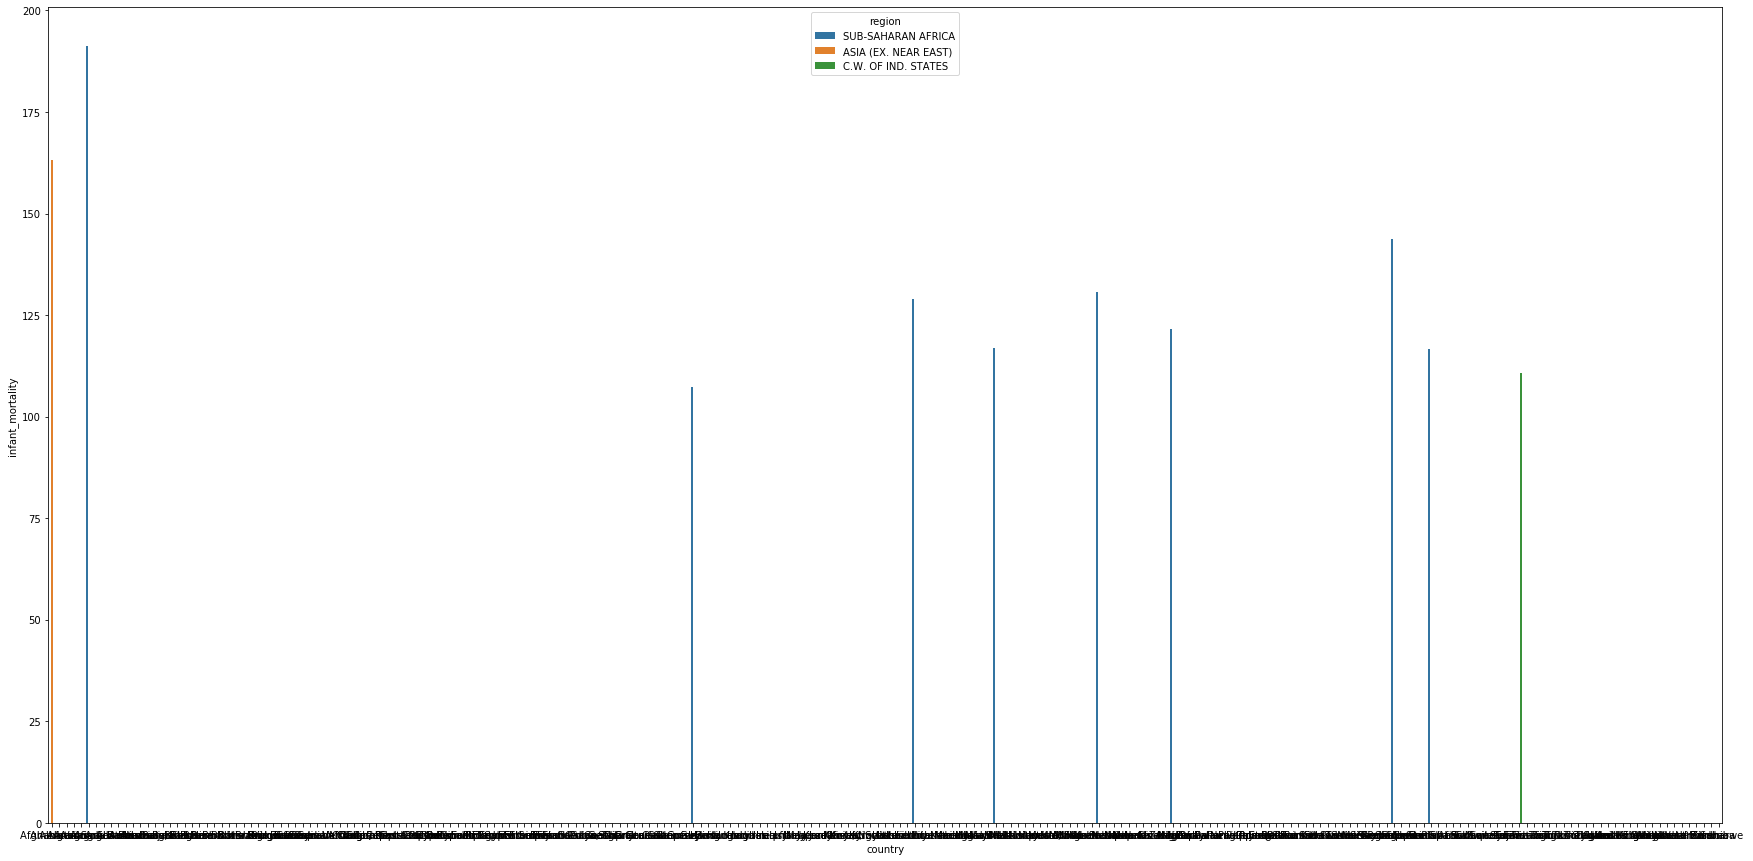

In [41]:
plt.subplots(figsize=(30,15))
df5=df.sort_values('infant_mortality',ascending=False).head(10)
sns.barplot(x='country',y='infant_mortality',hue='region',data=df5)
plt.show()

The infant mortality is maximum for Angola followed by Afghanistan and Sierra Leane

In [42]:
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df['infant_mortality'],
text = df.country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = False)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

African Countries have the highest mortality rate

In [43]:
fig = go.Figure(data=[    
    go.Bar(name='INFANT MORTALITY', x=df.nlargest(10, 'population')['country'], y=df['infant_mortality']),
    go.Bar(name='BIRTH RATE', x=df.nlargest(10, 'population')['country'], y=df['birthrate']),
    go.Bar(name='DEATH RATE', x=df.nlargest(10, 'population')['country'], y=df['deathrate'])
])

fig.update_layout(barmode='group')
fig.show()

Sub-Saharan Africa has the Highest Death and Infant mortality rate

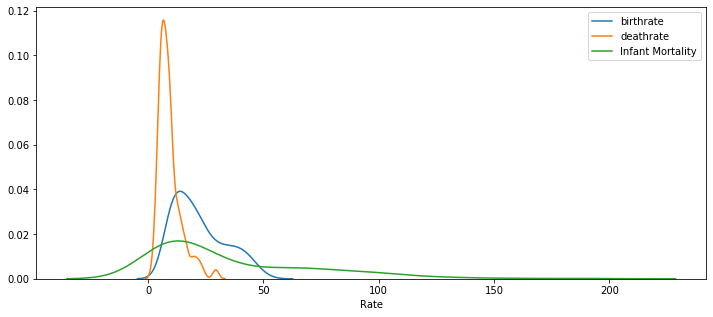

In [44]:
plt.subplots(figsize=(12,5))
sns.distplot(df['birthrate'],hist=False,label='birthrate')
sns.distplot(df['deathrate'],hist=False, label='deathrate')
sns.distplot(df['infant_mortality'],hist=False, label='Infant Mortality')
plt.xlabel('Rate')
plt.show()

The probability of 0-20 deaths per 1000 people of population is maximum whereas the probability of 20-60 births per 1000 people of population is maximum.

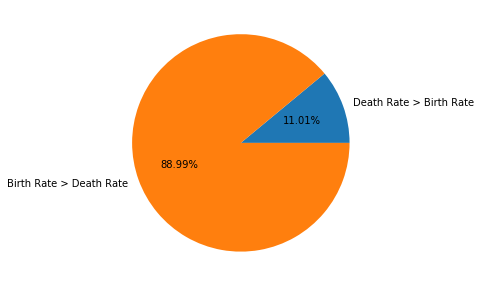

In [45]:
plt.subplots(figsize=(5,5))
df7=df[df['deathrate']>df['birthrate']].shape[0]
plt.pie([df7,(df.shape[0]-df7)],labels=['Death Rate > Birth Rate','Birth Rate > Death Rate'],autopct="%0.2f%%")
plt.show()

About 11% of the population have Death Rate>Birth Rate

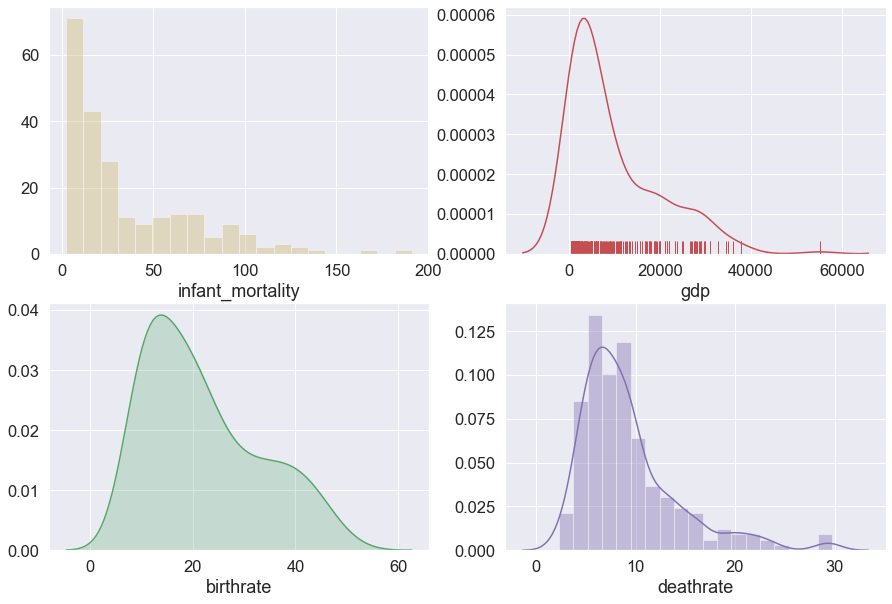

In [46]:
sns.set(style="darkgrid",font_scale=1.5)
f, axes = plt.subplots(2,2,figsize=(15,10))

sns.distplot(df.infant_mortality,bins=20,kde=False,color="y",ax=axes[0,0])
sns.distplot(df.gdp,hist=False,rug=True,color="r",ax=axes[0,1])
sns.distplot(df.birthrate,hist=False,color="g",kde_kws={"shade":True},ax=axes[1,0])
sns.distplot(df.deathrate,color="m",ax=axes[1,1])

Both Birth and Death rate have a high correlation with Infant Mortality rate

# Net migration

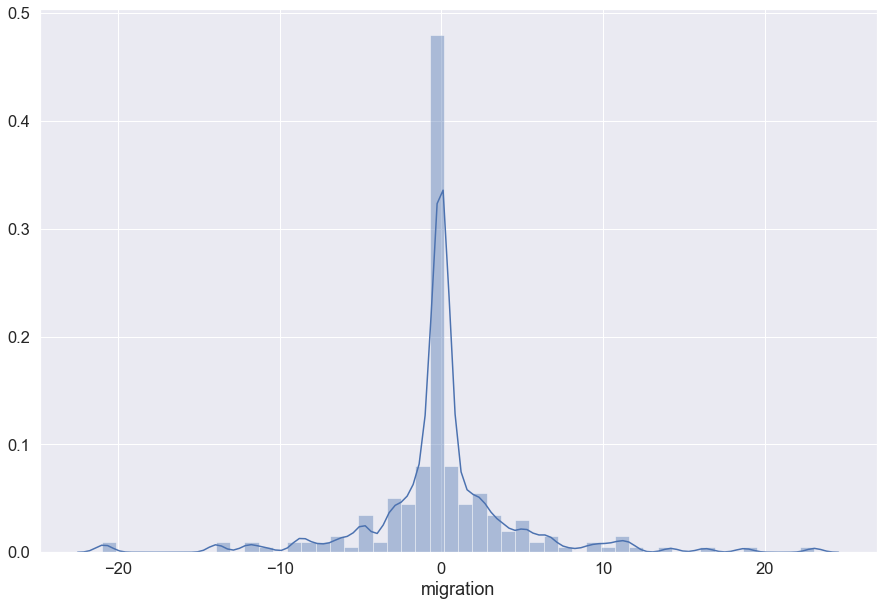

In [47]:
plt.subplots(figsize=(15,10))
sns.distplot(df['migration'])
plt.show()

In [48]:
 df.nlargest(20, 'migration')

country                region  population     area  density  \
0           Afghanistan   ASIA (EX. NEAR EAST)    31056997   647500     48.0   
38       Cayman Islands    LATIN AMER. & CARIB       45436      262    173.4   
166               Qatar              NEAR EAST      885359    11437     77.4   
111              Kuwait              NEAR EAST     2418393    17820    135.7   
208   Turks & Caicos Is    LATIN AMER. & CARIB       21152      430     49.2   
184           Singapore   ASIA (EX. NEAR EAST)     4492150      693   6482.2   
177          San Marino         WESTERN EUROPE       29251       61    479.5   
6              Anguilla    LATIN AMER. & CARIB       13477      102    132.1   
28   British Virgin Is.    LATIN AMER. & CARIB       23098      153    151.0   
153  N. Mariana Islands                OCEANIA       82459      477    172.9   
121          Luxembourg         WESTERN EUROPE      474413     2586    183.5   
138              Monaco         WESTERN EUROPE       32543        2  16271.5   
134             Mayotte     SUB-SAHARAN AFRICA      201234      374    538.1   
4               Andorra         WESTERN EUROPE       71201      468    152.1   
105              Jordan              NEAR EAST     5906760    92300     64.0   
70        French Guiana    LATIN AMER. & CARIB      199509    91000      2.2   
36               Canada       NORTHERN AMERICA    33098932  9984670      3.3   
188             Somalia     SUB-SAHARAN AFRICA     8863338   637657     13.9   
99          Isle of Man         WESTERN EUROPE       75441      572    131.9   
91            Hong Kong   ASIA (EX. NEAR EAST)     6940432     1092   6355.7   

     coastline  migration  infant_mortality      gdp    literacy  phones  \
0         0.00      23.06            163.07    700.0   36.000000     3.2   
38       61.07      18.75              8.19  35000.0   98.000000   836.3   
166       4.92      16.29             18.61  21500.0   82.500000   232.0   
111       2.80      14.18              9.95  19000.0   83.500000   211.0   
208      90.47      11.68             15.67   9600.0   98.000000   269.5   
184      27.85      11.53              2.29  23700.0   92.500000   411.4   
177       0.00      10.98              5.73  34600.0   96.000000   704.3   
6        59.80      10.76             21.03   8600.0   95.000000   460.0   
28       52.29      10.01             18.05  16000.0   97.800000   506.5   
153     310.69       9.61              7.11  12500.0   97.000000   254.7   
121       0.00       8.97              4.81  55100.0  100.000000   515.4   
138     205.00       7.75              5.43  27000.0   99.000000  1035.6   
134      49.52       6.78             62.40   2600.0   82.838278    49.7   
4         0.00       6.60              4.05  19000.0  100.000000   497.2   
105       0.03       6.59             17.35   4300.0   91.300000   104.5   
70        0.42       6.27             12.07   8300.0   83.000000   255.6   
36        2.02       5.96              4.75  29800.0   97.000000   552.2   
188       0.47       5.37            116.70    500.0   37.800000    11.3   
99       27.97       5.36              5.93  21000.0   82.838278   676.0   
91       67.12       5.24              2.97  28800.0   93.500000   546.7   

        arable     crops       other   climate  birthrate  deathrate  \
0    12.130000  0.220000   87.650000  1.000000      46.60      20.34   
38    3.850000  0.000000   96.150000  2.000000      12.74       4.89   
166   1.640000  0.270000   98.090000  1.000000      15.56       4.72   
111   0.730000  0.110000   99.160000  1.000000      21.94       2.41   
208   2.330000  0.000000   97.670000  2.000000      21.84       4.21   
184   1.640000  0.000000   98.360000  2.000000       9.34       4.28   
177  16.670000  0.000000   83.330000  2.139024      10.02       8.17   
6     0.000000  0.000000  100.000000  2.000000      14.17       5.34   
28   20.000000  6.670000   73.330000  2.000000      14.89       4.42   
153  13.040000  4.3

the negative migration of a country becomes positive migration for another country(s)

# Phones

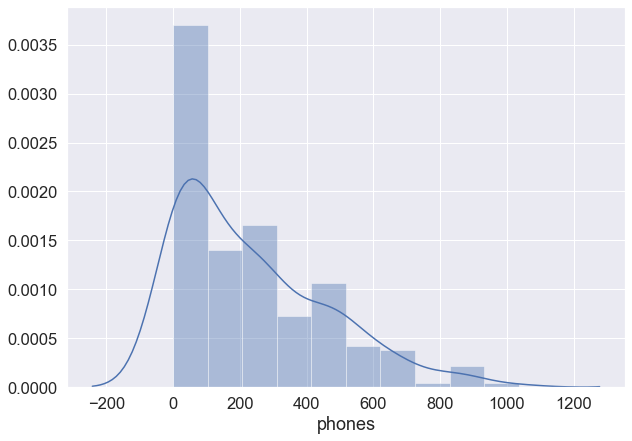

In [49]:
plt.subplots(figsize=(10,7))
sns.distplot(df['phones'])
plt.show()

In [50]:
df.nlargest(20, 'phones')

country                region  population     area  \
138                Monaco         WESTERN EUROPE       32543        2   
214         United States       NORTHERN AMERICA   298444215  9631420   
78              Gibraltar         WESTERN EUROPE       27928        7   
22                Bermuda       NORTHERN AMERICA       65773       53   
85               Guernsey         WESTERN EUROPE       65409       78   
38         Cayman Islands    LATIN AMER. & CARIB       45436      262   
104                Jersey         WESTERN EUROPE       91084      116   
195                Sweden         WESTERN EUROPE     9016596   449964   
177            San Marino         WESTERN EUROPE       29251       61   
174  St Pierre & Miquelon       NORTHERN AMERICA        7026      242   
196           Switzerland         WESTERN EUROPE     7523934    41290   
99            Isle of Man         WESTERN EUROPE       75441      572   
76                Germany         WESTERN EUROPE    82422299   357021   
220        Virgin Islands    LATIN AMER. & CARIB      108605     1910   
93                Iceland         WESTERN EUROPE      299388   103000   
172   Saint Kitts & Nevis    LATIN AMER. & CARIB       39129      261   
54                Denmark         WESTERN EUROPE     5450661    43094   
198                Taiwan   ASIA (EX. NEAR EAST)    23036087    35980   
79                 Greece         WESTERN EUROPE    10688058   131940   
69                 France         WESTERN EUROPE    60876136   547030   

     density  coastline  migration  infant_mortality      gdp    literacy  \
138  16271.5     205.00       7.75              5.43  27000.0   99.000000   
214     31.0       0.21       3.41              6.50  37800.0   97.000000   
78    3989.7     171.43       0.00              5.13  17500.0   82.838278   
22    1241.0     194.34       2.49              8.53  36000.0   98.000000   
85     838.6      64.10       3.84              4.71  20000.0   82.838278   
38     173.4      61.07      18.75              8.19  35000.0   98.000000   
104    785.2      60.34       2.76              5.24  24800.0   82.838278   
195     20.0       0.72       1.67              2.77  26800.0   99.000000   
177    479.5       0.00      10.98              5.73  34600.0   96.000000   
174     29.0      49.59      -4.86              7.54   6900.0   99.000000   
196    182.2       0.00       4.05              4.39  32700.0   99.000000   
99     131.9      27.97       5.36              5.93  21000.0   82.838278   
76     230.9       0.67       2.18              4.16  27600.0   99.000000   
220     56.9       9.84      -8.94              8.03  17200.0   82.838278   
93       2.9       4.83       2.38              3.31  30900.0   99.900000   
172    149.9      51.72      -7.11             14.49   8800.0   97.000000   
54     126.5      16.97       2.48              4.56  31100.0  100.000000   
198    640.3       4.35       0.00              6.40  23400.0   96.100000   
79      81.0      10.37       2.35              5.53  20000.0   97.500000   
69     111.3       0.63       0.66              4.26  27600.0   99.000000   

     phones     arable     crops       other   climate  birthrate  deathrate  \
138  1035.6   0.000000  0.000000  100.000000  2.139024       9.19      12.91   
214   898.0  19.130000  0.220000   80.650000  3.000000      14.14       8.26   
78    877.7   0.000000  0.000000  100.000000  2.139024      10.74       9.31   
22    851.4  20.000000  0.000000   80.000000  2.000000      11.40       7.74   
85    842.4  13.797111  4.564222   81.638311  3.000000       8.81      10.01   
38    836.3   3.850000  0.000000   96.150000  2.000000      12.74       4.89   
104   811.3   0.000000  0.000000  100.000000  3.000000       9.30       9.28   
195   715.0   6.540000  0.010000   93.450000  3.000000      10.27      10.31   
177   704.3  16.670000  0.000000   83.330000  2.139024      10.02       8.17   
174   683.2  13.040000  0.000000   86.960000  2.139024      13.52  

Most of the people around the world don't own a phone

Some people have more than a one phone

# Correlation between each feature

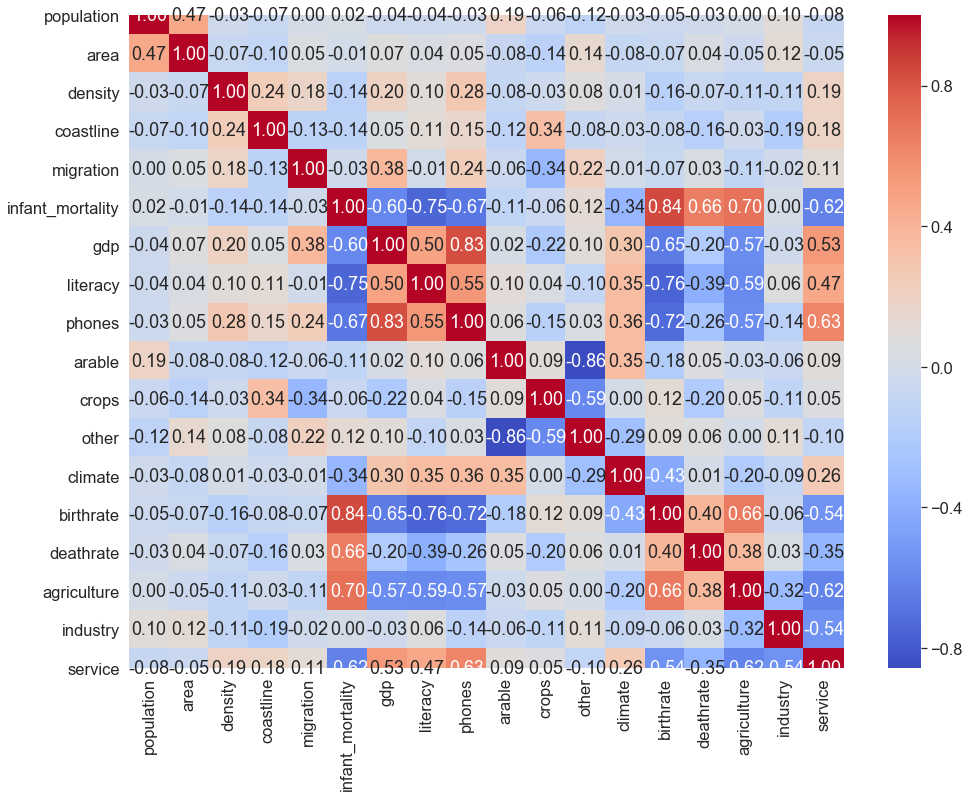

In [51]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

The heatmap shows the correlation between all numerical columns.

Net migration is moderately corelated to GDP

Infant mortality rate is negatively corelated with GDP, Literacy and positively coralated to birthrate and deathrate

GDP is moderately corelated net migration and highly with literacy anad service, negatively with birthrate and agriculture

Countries which primarily depend on agriculture have high infant mortality rate

Service is positively correlated with GDP,Literacy, phones per 1000

# comparison of the enconomy structure for the countries with hightest total GDP.

# GDP vs Agriculture/Industry/Service

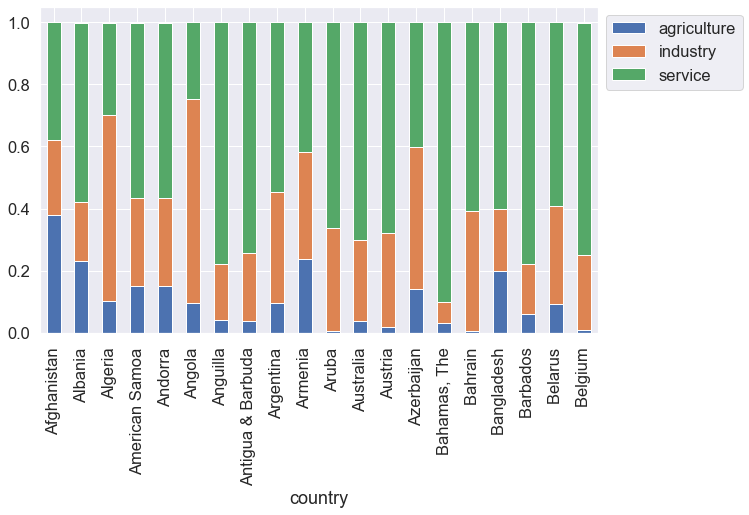

In [52]:
plot_data = df.head(20)[['country','agriculture', 'industry', 'service']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


Higher GDP Countries don't rely on Agriculture as much as the poorer countries

GDP grows as Industries grows and then falls after a certain threshold

GDP is highly correlated with Service sector

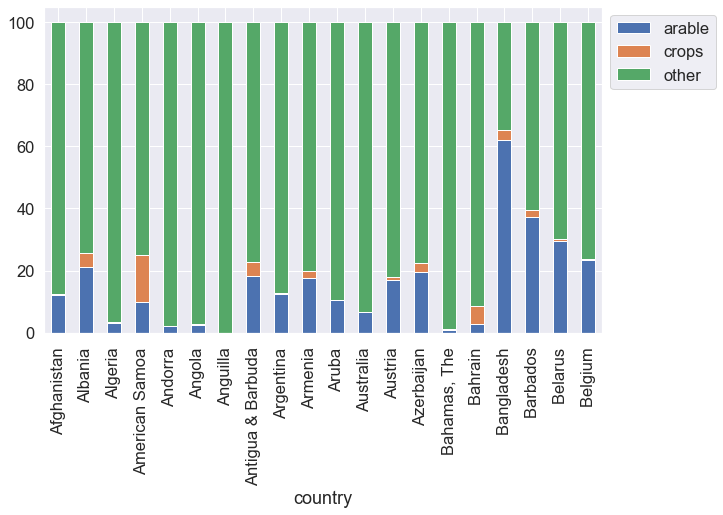

In [53]:
plot_data = df.head(20)[['country','arable', 'crops', 'other']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [54]:
df.corr()

population      area   density  coastline  migration  \
population          1.000000  0.469985 -0.028190  -0.068199   0.000011   
area                0.469985  1.000000 -0.066917  -0.095627   0.047442   
density            -0.028190 -0.066917  1.000000   0.241690   0.177990   
coastline          -0.068199 -0.095627  0.241690   1.000000  -0.134035   
migration           0.000011  0.047442  0.177990  -0.134035   1.000000   
infant_mortality    0.022994 -0.007159 -0.144200  -0.136465  -0.025015   
gdp                -0.039319  0.072179  0.195751   0.049109   0.381969   
literacy           -0.043376  0.035784  0.095056   0.113651  -0.008506   
phones             -0.030803  0.053360  0.280079   0.152050   0.239424   
arable              0.188201 -0.079674 -0.080999  -0.120636  -0.057689   
crops              -0.060741 -0.143844 -0.031655   0.341433  -0.340151   
other              -0.120575  0.138904  0.081844  -0.079404   0.222815   
climate            -0.026439 -0.082128  0.006830  -0.031614  -0.014878   
birthrate          -0.045075 -0.066389 -0.159150  -0.075715  -0.066523   
deathrate          -0.028354  0.040049 -0.070022  -0.161703   0.033605   
agriculture         0.000375 -0.050380 -0.105925  -0.028483  -0.105674   
industry            0.099109  0.120907 -0.105524  -0.185124  -0.023679   
service            -0.080681 -0.054080  0.187798   0.181939   0.113697   

                  infant_mortality       gdp  literacy    phones    arable  \
population                0.022994 -0.039319 -0.043376 -0.030803  0.188201   
area                     -0.007159  0.072179  0.035784  0.053360 -0.079674   
density                  -0.144200  0.195751  0.095056  0.280079 -0.080999   
coastline                -0.136465  0.049109  0.113651  0.152050 -0.120636   
migration                -0.025015  0.381969 -0.008506  0.239424 -0.057689   
infant_mortality          1.000000 -0.600002 -0.745543 -0.669715 -0.113094   
gdp                      -0.600002  1.000000  0.497963  0.830549  0.019643   
literacy                 -0.745543  0.497963  1.000000  0.549913  0.101927   
phones                   -0.669715  0.830549  0.549913  1.000000  0.059606   
arable                   -0.113094  0.019643  0.101927  0.059606  1.000000   
crops                    -0.061159 -0.218330  0.038808 -0.149517  0.094361   
other                     0.123072  0.097215 -0.102439  0.029317 -0.856763   
climate                  -0.342848  0.302404  0.352569  0.358574  0.353444   
birthrate                 0.844968 -0.648808 -0.755196 -0.722329 -0.183449   
deathrate                 0.655734 -0.201148 -0.386376 -0.259708  0.052991   
agriculture               0.697303 -0.570735 -0.585492 -0.571704 -0.034080   
industry                  0.003510 -0.027935  0.060661 -0.140516 -0.061923   
service                  -0.618623  0.529995  0.465706  0.625770  0.088649   

                     crops     other   climate  birthrate  deathrate  \
population       -0.060741 -0.120575 -0.026439  -0.045075  -0.028354   
area             -0.143844  0.138904 -0.082128  -0.066389   0.040049   
density          -0.031655  0.081844  0.006830  -0.159150  -0.070022   
coastline         0.341433 -0.079404 -0.031614  -0.075715  -0.161703   
migration        -0.340151  0.222815 -0.014878  -0.066523   0.033605   
infant_mortality -0.061159  0.123072 -0.342848   0.844968   0.655734   
gdp              -0.218330  0.097215  0.302404  -0.648808  -0.201148   
literacy          0.038808 -0.102439  0.352569  -0.755196  -0.386376   
phones           -0.149517  0.029317  0.358574  -0.722329  -0.259708   
arable            0.094361 -0.856763  0.353444  -0.183449   0.052991   
crops             1.000000 -0.594254  0.004121   0.117851  -0.201520   
other            -0.594254  1.000000 -0.287632   0.087124   0.061624   
climate           0.004121 -0.287632  1.000000  -0.427579   0.010458   
birthrate         0.117851  0.087124 -0.427579   1.000000   0.395293   
deathrate        -0.201520  0.061624  0.010458  

There are relationships with these features (gdp,infant mortality,birthrate,phones,literacy,service)

# Correlation between Total GDP and factors

In [55]:
corr_matrix = df.corr()
corr_matrix["gdp"].sort_values(ascending=False)

gdp                 1.000000
phones              0.830549
service             0.529995
literacy            0.497963
migration           0.381969
climate             0.302404
density             0.195751
other               0.097215
area                0.072179
coastline           0.049109
arable              0.019643
industry           -0.027935
population         -0.039319
deathrate          -0.201148
crops              -0.218330
agriculture        -0.570735
infant_mortality   -0.600002
birthrate          -0.648808
Name: gdp, dtype: float64

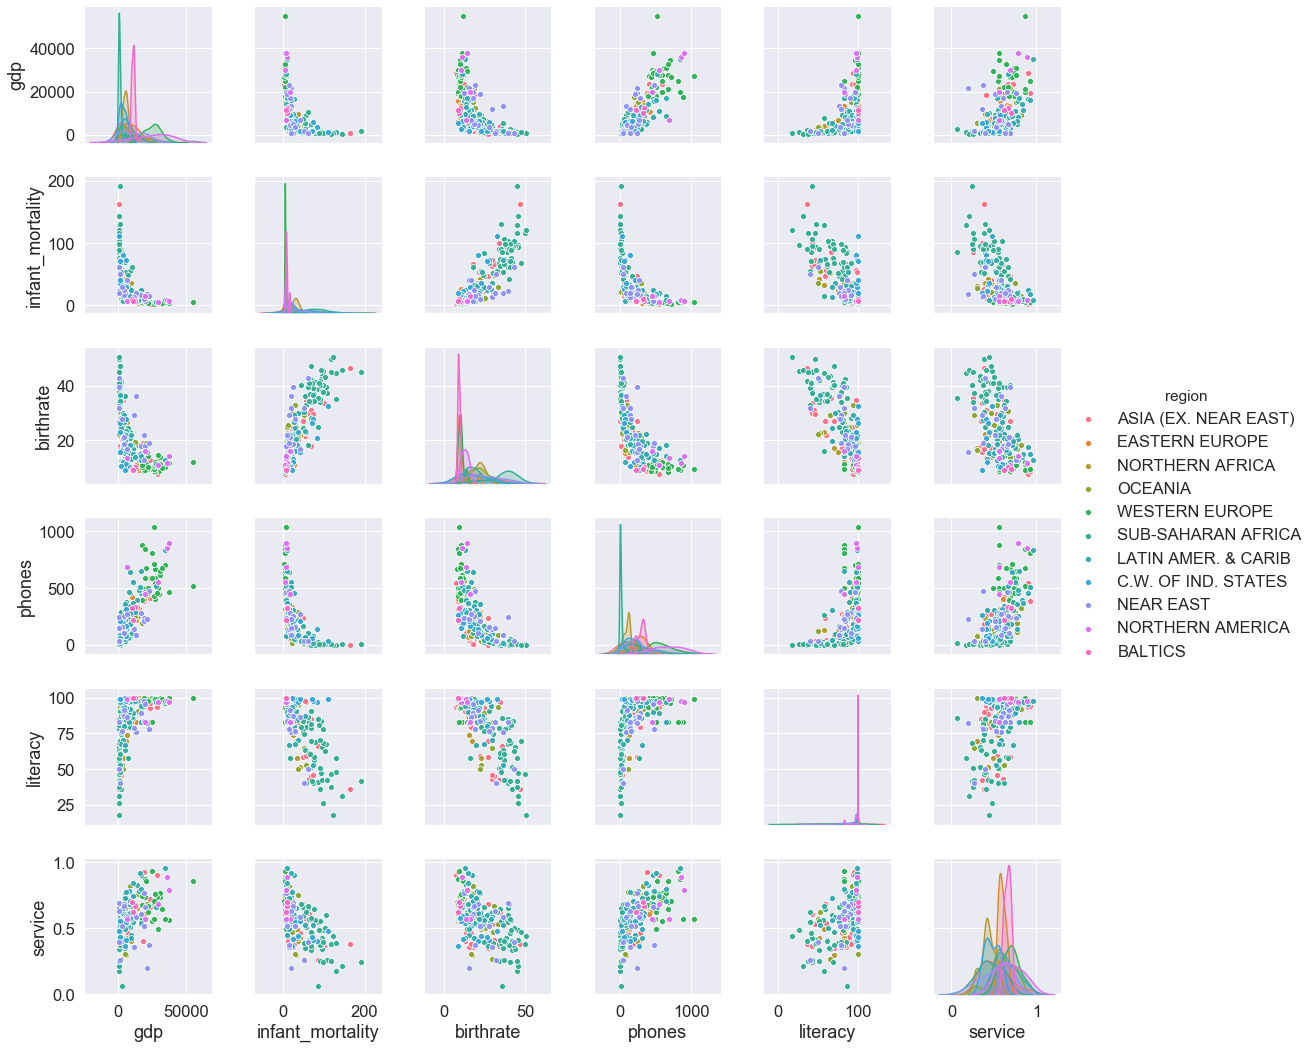

In [56]:
sns.pairplot(df, vars= ["gdp","infant_mortality","birthrate","phones","literacy","service"],hue='region',diag_kind="kde")

# Features importance

In [57]:
features = ["phones","infant_mortality","service","literacy",'agriculture', 'industry','arable', 'crops',
            'population','area','density','coastline','migration','literacy','climate','birthrate','deathrate']

y = df['gdp']
x = df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [58]:
# create the RFE model and select 8 attributes
model=LinearRegression()
rfe = RFE(model, n_features_to_select = 8)

rfe = rfe.fit(x, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(x.columns[rfe.support_]))

Selected features: ['infant_mortality', 'service', 'agriculture', 'industry', 'crops', 'migration', 'climate', 'deathrate']


# Prediction GDP

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


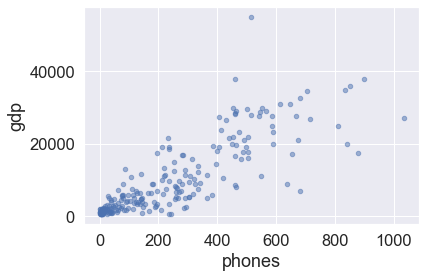

In [76]:
df.plot(kind="scatter", x="phones", y="gdp", alpha=0.5)
#plt.savefig('scatter.png')

# Linear Regression

In [60]:
#linear regression
X = df['phones'].values
y = df['gdp'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))


MSE: 51337954.73836976
R squared: 0.5971423536436442


# Multi-linear Regression

In [61]:
# multi-linear regression 
X = df.drop(['gdp','country'], axis=1)
y = df[['gdp']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 51337954.73836976
R squared: 0.5971423536436442


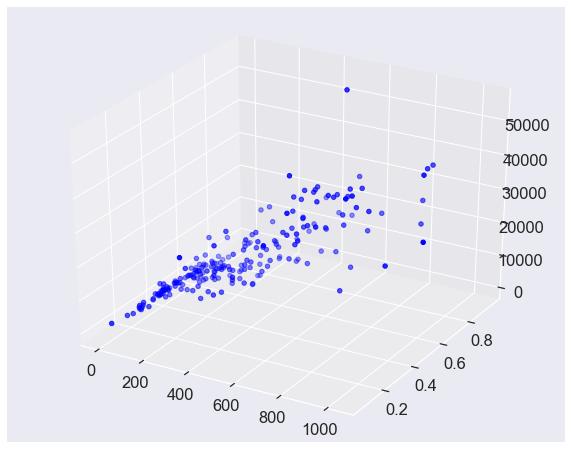

In [62]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, projection='3d')
X = df['phones'].values
Y = df['service'].values
Z = df['gdp'].values
ax.scatter(X,Y,Z, c='#0000FF')

# Ridge regression

In [80]:
#Ridge regression
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
X = df.drop(['gdp','country'], axis=1)
y = df[['gdp']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
model = LinearRegression()
model.fit(x_train, y_train)

print('R_square score on the training: %.2f' % model.score(x_train, y_train))

model_predict = model.predict(x_test)

print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, model_predict))
print('R_square score: %.2f' % r2_score(y_test, model_predict))

R_square score on the training: 0.76
Coefficients: 
 [[ 3.08207687e+01 -3.04209000e+03  1.30790645e+01 -1.34239270e+04
   3.59397215e+02  5.37442773e+01  2.09326413e-05]]
Mean squared error: 38285980.61
Mean absolute error: 3622.53
R_square score: 0.70


In [81]:
from sklearn.model_selection import GridSearchCV
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)


grid_cv.fit(x_train, y_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_


print("R^2 score on training data: %.2f" %grid_cv.score(x_train, y_train))
print("R^2 score: %.2f"
      % metrics.r2_score(y_test, grid_cv.best_estimator_.predict(x_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, model_predict))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.75
R^2 score: 0.71
Mean squared error: 38285980.61
Mean absolute error: 3622.53


The Ridge Regression uses La regularization to minimize the weights of the coefficients, this is controlled with the hyperparameter alpha. Increasing the value of alpha decreases the weights of the coefficients.
We performed a grid search with cross-validation on the grid regression with alpha varying between 0 and 10 and having 3 max iterations of 10, 100 and 1000. Finally the best parameters here are alpha = 1, and max iterations = 10. 

# Lasso regression

In [82]:
from sklearn.linear_model import Lasso
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(x_train, y_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(x_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(x_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, model_predict))

Best Parameters: {'alpha': 9, 'max_iter': 100}
R^2 score on training data: 0.76
R^2 score: 0.70
Mean squared error: 38285980.61
Mean absolute error: 3622.53


# ElasticNet regression

In [83]:
#appel de la classe SGDRegressor
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(loss="squared_loss",penalty="elasticnet",alpha=0.7,
l1_ratio=0.85,fit_intercept=False,max_iter=100)
#application sur les données
reg.fit(x_train,y_train)
#affichage
print(reg.coef_) 


[ 5.67862083e+12  1.30869827e+11  2.20048657e+13  4.78283656e+10
 -4.46572296e+11  2.96643666e+12 -1.38078008e+14]


# Polynomial Regression

In [84]:
# polynomial regression 
x = df[[  "phones","service","literacy",'agriculture','migration','deathrate','area']]
#x = df[[  "phones","service","literacy",'agriculture','climate','migration','birthrate','agriculture']]
#x=[["infant_mortality","service","arable","industry","agriculture","literacy","phones"]]
y = df[['gdp']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit=poly.fit_transform(x_train)
lg.fit(x_train_fit,y_train)
x_test_=poly.fit_transform(x_test)
predicted=lg.predict(x_test_)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 25441164.847670842
R squared: 0.7519592731637132


with the increase in literacy there is an increase in GDP.
countries with lesser bithrate tends to show a higher GDP.
with an increase in service domain in a country their is a higher GDP.
Linear increase in GDP with Phones.
Agriculture effects GDP.

# SVM

In [85]:
from sklearn import svm

svr= svm.SVR(gamma='scale')
svr.fit(x_train,y_train)
y_pred_svr=svr.predict(x_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred_svr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred_svr))
print("R squared:",metrics.r2_score(y_test,y_pred_svr))

Mean squared error: 119289457.50
Variance score: -0.16
R squared: -0.16302236628508382


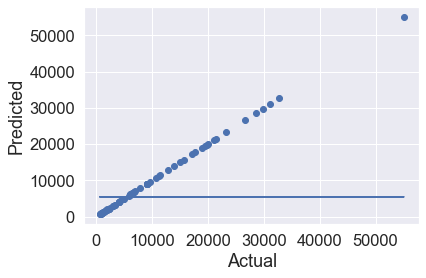

In [79]:
#Plotting Predicted vs Actual gdp

plt.scatter(y_test,y_test)
plt.plot(y_test,y_pred_svr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Gradient boosting

In [86]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
X = df.drop(['gdp','country'], axis=1)
y = df[['gdp']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
model = ensemble.GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
print('Gradient Boosting R squared": %.4f' % model.score(x_test, y_test))
y_pred = model.predict(x_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared": 0.8123
Gradient Boosting RMSE: 4891.3955


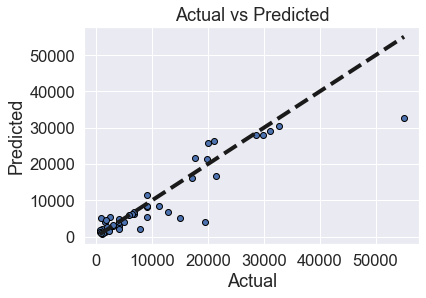

In [89]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [90]:
feature_labels = np.array(["phones","infant_mortality","service","literacy",'agriculture', 'industry','arable', 'crops',
            'population','area','density','coastline','migration','literacy','climate','birthrate','deathrate'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

infant_mortality-0.92%
service-0.94%
industry-2.15%
arable-2.61%
agriculture-8.22%
literacy-13.09%
phones-72.06%


# Random Forest Regression


In [91]:
# random Forest regression 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
x = df[[  "phones","service","literacy",'agriculture','migration','deathrate','area']]
y = df[['gdp']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(x_train, y_train)

random_forest_score = cross_val_score(random_forest_fit, x_train, y_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(x_train, y_train))
print("R^2 score on the test data %.2f"
      %r2_score(y_test, random_forest_fit.predict(x_test)))

mean cross validation score: 0.74
score without cv: 0.97
R^2 score on the test data 0.80


Now we will use the Random Forest Regression
The alogorithm has learned 96% on the training data without cross validation and 75% with, the value is 76 % on the test data.

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
random_forest_model_predict = random_forest_model.predict(x_test)

scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(x_train, y_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(x_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(x_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, random_forest_model_predict))

Best Parameters: {'min_samples_split': 7}
R^2 score on training data: 0.94
R^2 score: 0.80
Mean squared error: 20758296.85
Mean absolute error: 2666.51


After performing grid search in the range 2 to 10 for the minimun samples split we get 5 for the split. The R square on the training is 95 % while on the test it is 80% and a MAE of 2851.62 and MSE of 24899546.00.